# **NY Dog Bite Analysis Project**

<font size ="3">Comprehensive data analysis of dog bite incidents using NYC Open Data via Kaggle dataset and coding platform.

<font size ="3">Processe and analyze records from the New York City's Department of Health and Mental Hygiene. This Analysis focuses on exploring and manipulating the data to uncover key trends and insights. Provide brief, data-driven insights throughout the analysis, highlighting significant patterns and anomalies. The customized visualizations were designed to effectively communicate findings and support public health initiatives.</font>

## Installation of Libraries and Packages

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
#!pip install --upgrade seaborn pandas
#!pip install yellowbrick  # To use costume color palletes with color hex codes. Code disabled after initial install

# Importing the Plotting libraries
import matplotlib.pyplot as plt # Basic plotting 
import seaborn as sns           # Statistical data visualization
import plotly.express as px     # Interactive plotting
from yellowbrick.style import set_palette  # Machine learning visualizing tool. Also for custom color palettes
from matplotlib.lines import Line2D        # Creating custom lines in plots
import warnings

# Suppresses FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning, module="pandas")

In [3]:
# Reading the Dog Bites data set
df = pd.read_csv('DOHMH_Dog_Bite_Data_20240111.csv')

# **Cleaning and Preparing Data**

In [4]:
# Quick glimpse of data
df.head()

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
0,1,January 01 2018,DOG,UNKNOWN,NaN,U,False,Brooklyn,11220
1,2,January 04 2018,DOG,UNKNOWN,NaN,U,False,Brooklyn,NaN
2,3,January 06 2018,DOG,Pit Bull,NaN,U,False,Brooklyn,11224
3,4,January 08 2018,DOG,Mixed/Other,4,M,False,Brooklyn,11231
4,5,January 09 2018,DOG,Pit Bull,NaN,U,False,Brooklyn,11224


<font size="3">From this glimpse of the data we can already see that are 'null' and 'unknown' values. Date is also in a format that will change to make working with date easier. 'Age' column is a mix of numbers and letters; this will also be changed.</font>

In [5]:
# Summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22663 entries, 0 to 22662
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UniqueID    22663 non-null  int64 
 1   DateOfBite  22663 non-null  object
 2   Species     22663 non-null  object
 3   Breed       20445 non-null  object
 4   Age         11442 non-null  object
 5   Gender      22663 non-null  object
 6   SpayNeuter  22663 non-null  bool  
 7   Borough     22663 non-null  object
 8   ZipCode     16805 non-null  object
dtypes: bool(1), int64(1), object(7)
memory usage: 1.4+ MB


<font size="3"> Majority of the data types ('Dtype') are not defined as indicated by the 'object' Dtype. Data types will be set later in the analysis; this will prevent possible data errors when doing calculations. There are a total of 22663 entries. From the 'Non-Null Count', any thing less than the 'RangeIndex' value, represents the column contains 'null' values.</font>

### **Null Values**

In [6]:
# Checking null values in the columns
df.isnull().sum()

UniqueID          0
DateOfBite        0
Species           0
Breed          2218
Age           11221
Gender            0
SpayNeuter        0
Borough           0
ZipCode        5858
dtype: int64

<font size ="3"> Want to keep the rows that contain 'NaN' values in the Age column. Removing the NaN rows from the 'Age' column would remove at least half of the dataset. That, and a dog's age may not have been known at time of bite, so (0) Age value is valid. The Breed and ZipCode null values will be focused on also. </font>

In [7]:
# Replace 'NaN' values in 'Age' column with '0'
df.fillna({'Age':'0'}, inplace=True)
df.head() # Viewing the dataframe to see results of replacing NaN values

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
0,1,January 01 2018,DOG,UNKNOWN,0,U,False,Brooklyn,11220
1,2,January 04 2018,DOG,UNKNOWN,0,U,False,Brooklyn,NaN
2,3,January 06 2018,DOG,Pit Bull,0,U,False,Brooklyn,11224
3,4,January 08 2018,DOG,Mixed/Other,4,M,False,Brooklyn,11231
4,5,January 09 2018,DOG,Pit Bull,0,U,False,Brooklyn,11224


In [8]:
# Replace 'NaN' values in 'Breed' column with 'Unknown'
df.fillna({'Breed':'Unknown'}, inplace=True)
df.head() # Viewing the dataframe to see results of replacing NaN values

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
0,1,January 01 2018,DOG,UNKNOWN,0,U,False,Brooklyn,11220
1,2,January 04 2018,DOG,UNKNOWN,0,U,False,Brooklyn,NaN
2,3,January 06 2018,DOG,Pit Bull,0,U,False,Brooklyn,11224
3,4,January 08 2018,DOG,Mixed/Other,4,M,False,Brooklyn,11231
4,5,January 09 2018,DOG,Pit Bull,0,U,False,Brooklyn,11224


In [9]:
# Replace 'NaN' values in 'ZipCode' column with '00000'
df.fillna({'ZipCode':'00000'}, inplace=True)
df.head() # Viewing the dataframe to see results of replacing NaN values

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
0,1,January 01 2018,DOG,UNKNOWN,0,U,False,Brooklyn,11220
1,2,January 04 2018,DOG,UNKNOWN,0,U,False,Brooklyn,00000
2,3,January 06 2018,DOG,Pit Bull,0,U,False,Brooklyn,11224
3,4,January 08 2018,DOG,Mixed/Other,4,M,False,Brooklyn,11231
4,5,January 09 2018,DOG,Pit Bull,0,U,False,Brooklyn,11224


<font size ="3"> Dog breed may not have been known by the person bit so 'null' breeds will be designated as 'Unknown'. Same for the ZipCode, person might not have known zipcode at time of incident so unknown zipcodes were coded to (0). More information is needed on how this data was collected and entered into original system.</font>

In [10]:
# Re-checking null values in the columns
df.isnull().sum()

UniqueID      0
DateOfBite    0
Species       0
Breed         0
Age           0
Gender        0
SpayNeuter    0
Borough       0
ZipCode       0
dtype: int64

## **Duplicates**
<font size=3> The main column to focus on for duplicates is the 'UnqiueID' column. The rest of the data will have duplicates due to the nature of it.</font>

In [11]:
# Check for duplicates in the 'UniqueID' column
IdDups = df.duplicated('UniqueID', keep=False)

# Print the status of duplicates within the 'UniqueID' column
if IdDups.any():
    print("\nThere are duplicates in the UniqueID column.")
    
    # Display the duplicated 'UniqueID's and their counts
    duplicate_ids = df.loc[IdDups, 'UniqueID']
    print("\nDuplicated UniqueIDs:")
    print(duplicate_ids.value_counts())
else:
    print("\nNo duplicates found in the UniqueID column.")


There are duplicates in the UniqueID column.

Duplicated UniqueIDs:
1        2
6907     2
6849     2
6850     2
6851     2
        ..
3429     2
3430     2
3431     2
3432     2
10280    2
Name: UniqueID, Length: 10280, dtype: int64


<font size="3"> I want to see what the duplicates are made of it appears that almost half of the dataset has the UniqueID's duplicated.</font>

In [12]:
df[df['UniqueID'] == 9874] #Randomly picked an UniqueID value.

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
9873,9874,December 15 2019,DOG,Great Dane,0,U,False,Queens,11413
22256,9874,September 01 2016,DOG,Shih Tzu,7,M,True,Staten Island,00000


<font size="3"> Even though the UniqueID has been duplicated, the data is for two different incidences in two different areas. Random UIDs have been entered and the results were the same. Same UID but different bite data; the duplication stops after the 10280th record. The ID field is no longer valid as it's integrity was not maintained. </font>

In [13]:
# Dropping the 'UniqueID' column.
df = df.drop(['UniqueID'], axis=1)

## **Data Types**

<font size="3"> Now to change data types and adjust some values to make analysis easier. Make sure the 'ZipCode' is in a number format and no non-numeric values are present.</font>

### ZipCode

In [14]:
# Replace non-numeric values with NaN
df['ZipCode'] = pd.to_numeric(df['ZipCode'], errors='coerce')

# Convert the 'zipcode' column to int64
df['ZipCode'] = df['ZipCode'].astype('Int64')

### Formate DateOfBite Column


In [15]:
# Will change the current date format into one that is yyyy-mm-dd and not an object.
df['DateOfBite'] = pd.to_datetime(df['DateOfBite'])

### Spay/Neuter column adjusted to something simplier 

In [16]:
# For the 'SpayNeuter' column, let's change the vaules to 'Y' for True and 'N' for False. 
df['SpayNeuter'] = df['SpayNeuter'].map({True: 'Y', False: 'N'})

### Age

<font size ="3">Now for the 'Age' column.  From the above df table, some enteries contain 'Y' after the number, this will need to be removed so that 'Age' value is an integer.</font>

In [17]:
# Convert the 'Age' column to string and remove 'Y'
df['Age'] = df['Age'].astype(str).str.replace('Y', '', regex=False)

# Convert the 'Age' column numbers and handle any errors that may occur
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')


# Now to convert values to integers and replace any NaN values with 0 instead
df['Age'] = df['Age'].fillna(0).astype(int)

In [18]:
# See all the unique ages of the 'Age' column
unique_age = sorted(df['Age'].unique())
unique_age # Displays the output

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 41]

<font size="3"> There appears to be some outliers in terms of dog age. Anything over 20 will be filtered out.</font>

In [19]:
# Filter out ages over 20
df = df[df['Age'] <= 20]

In [20]:
# Double check the 'Age' column.
unique_age2 = sorted(df['Age'].unique())
unique_age2 # Displays the output

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20]

### What breed along with it's gender, has managed to make it to 20 years old?

In [21]:
# What Breed(s) of dog and gender has managed to make it to 20?
old_dog = df.loc[df['Age'] == 20, ['Breed', 'Gender']]
old_dog## Now to set the 'category' data types for the non-numeric values

,Breed,Gender
3416,Unknown,M
5853,TERRIER MIX,M


### Setting the Data Types

In [22]:
# Set Category data types for non-numeric values
df[['Species','Breed','Gender', 'Borough']]= df[['Species','Breed',
                           'Gender', 'Borough']].astype('category')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22661 entries, 0 to 22662
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DateOfBite  22661 non-null  datetime64[ns]
 1   Species     22661 non-null  category      
 2   Breed       22661 non-null  category      
 3   Age         22661 non-null  int32         
 4   Gender      22661 non-null  category      
 5   SpayNeuter  22661 non-null  object        
 6   Borough     22661 non-null  category      
 7   ZipCode     22660 non-null  Int64         
dtypes: Int64(1), category(4), datetime64[ns](1), int32(1), object(1)
memory usage: 1007.4+ KB


# Fine Tuning the Data
<font size ="4"> Breaking down the 'DateOfBite' column further to aid in analysis.  This will create columns for month & year that bite occured.</font>

In [24]:
# One more date change to help with analysis. Will separate the parts of the dates to obtain the months and years

# Extract the month from the Bite Date column
df['BiteMonth'] = df['DateOfBite'].dt.month

#Extract the year from the Bite Date column
df['BiteYear'] = df['DateOfBite'].dt.year

In [25]:
# Viewing first 10 rows of revised table
df.head(10)

,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode,BiteMonth,BiteYear
0,2018-01-01,DOG,UNKNOWN,0,U,N,Brooklyn,11220,1,2018
1,2018-01-04,DOG,UNKNOWN,0,U,N,Brooklyn,0,1,2018
2,2018-01-06,DOG,Pit Bull,0,U,N,Brooklyn,11224,1,2018
3,2018-01-08,DOG,Mixed/Other,4,M,N,Brooklyn,11231,1,2018
4,2018-01-09,DOG,Pit Bull,0,U,N,Brooklyn,11224,1,2018
5,2018-01-03,DOG,BASENJI,4,M,N,Brooklyn,11231,1,2018
6,2018-01-01,DOG,UNKNOWN,0,U,N,Brooklyn,0,1,2018
7,2018-01-03,DOG,Pit Bull,0,U,N,Brooklyn,11233,1,2018
8,2018-01-04,DOG,American Pit Bull Mix / Pit Bull Mix,5,M,N,Brooklyn,11235,1,2018
9,2018-01-10,DOG,MIXED,3,F,N,Brooklyn,11208,1,2018


In [26]:
# Shows that number values have the corrected data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22661 entries, 0 to 22662
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DateOfBite  22661 non-null  datetime64[ns]
 1   Species     22661 non-null  category      
 2   Breed       22661 non-null  category      
 3   Age         22661 non-null  int32         
 4   Gender      22661 non-null  category      
 5   SpayNeuter  22661 non-null  object        
 6   Borough     22661 non-null  category      
 7   ZipCode     22660 non-null  Int64         
 8   BiteMonth   22661 non-null  int64         
 9   BiteYear    22661 non-null  int64         
dtypes: Int64(1), category(4), datetime64[ns](1), int32(1), int64(2), object(1)
memory usage: 1.3+ MB


In [27]:
# Count unique values in each column
df.nunique()

DateOfBite    2555
Species          1
Breed         1652
Age             20
Gender           3
SpayNeuter       2
Borough          6
ZipCode        513
BiteMonth       12
BiteYear         7
dtype: int64

<font size ="5"><b>Key points that the unique values are showing us?</b></font> 
<p></p>
<font size ="3">
    <li> DateOfBite - 2555 dates that bites took place.</li>
    <li> Species - Only 1 species present in the data/study</li>
    <li> Breed - We have 1652 breeds of dogs!</li>
    <li> Gender - 3 types of genders are present.</li>
    <li> Boroughs - 6 Boroughs or neighboohds. </li>
    <li> BiteMonth - 12, giving data for a year.</li>  
    <li> BiteYear - Study contains 7 years worth of data.</li>
    

# **Breed Analysis**

In [28]:
# Count unique values in the 'Breed' column
df['Breed'].nunique()

1652

<font size ="3"> Now to see all the values within the 'Breed' column. Seeing what's there will help create uniformity. The initial 'Breed' list and the revision code is quite extensive. The types will be condensed to first/main breed. Where the breed isn't clear, can not be determined or if there are multiples, it will be designated as either 'Unknown' or 'Mixed Breed'.<p>

The goal is to condense the breeds to a workable number.</font></p>

In [29]:
# Extract unique values from the 'Breed' column
breed_values = df['Breed'].unique()

# Convert the array of unique values to a list and sort it
breed_values_list = sorted(breed_values.tolist())

In [30]:
# Print the 'Breed' list
breed_values_list

# Breed Simplification, revising each dog breed
breed_classification = {
 '/SHIH TZU MIX': 'Shih Tzu',
 '2 BULL TERRIER DOGS': 'Terrier',
 '2 DOGS TERR X & DOBERMAN': 'Mixed Breed',
 '2 PITBULLS': 'Pit Bull',
 'AFRICAN BOERBOEL': 'Boerboel',
 'AIREDALE TERRIER': 'Terrier',
 'AKITA/CHOW CHOW': 'Akita',
 'ALAPAHA BULLDOG': 'Bull Dog',
 'ALASKAN HUSKY': 'Husky',
 'ALASKAN HUSKY MIX': 'Husky',
 'ALASKAN HUSKY/LABRADOR RETR':'Husky',
 'ALASKAN KLEE KAI': 'Husky',
 'ALASKAN MALAMUTE': 'Malamute',
 'ALASKAN MALMUTE' : 'Malamute',
 'ALPACA': 'Alpaca', #what??
 'ALSKAN MALAMUTE': 'Malamute',
 'AM STAFF/ PITBULL': 'A_Staff',
 'AMER BULL TERRIER': 'A_Staff',
 'AMER STAFF/AM PIT BULL TERR': 'A_Staff',
 'AMER STAFF/LAB X' : 'A_Staff',
 'AMER STAFFORDSHIRE X': 'A_Staff',
 'AMERICAN BULL': 'Bull Dog',
 'AMERICAN BULL / MASTIFF': 'Bull Dog',
 'AMERICAN BULL / STAFFORD TERRIER': 'Bull Dog',
 'AMERICAN BULL DOG': 'Bull Dog',
 'AMERICAN BULL DOG / PIT BULL MIX': 'Bull Dog',
 'AMERICAN BULL DOG/POINTER MIX': 'Bull Dog',
 'AMERICAN BULL MIX': 'Bull Dog',
 'AMERICAN BULL TERRIER': 'Bull Dog',
 'AMERICAN BULLDOG': 'Bull Dog',
 'AMERICAN BULLDOG/GREAT PYRENEES': 'Bull Dog',
 'AMERICAN BULLY': 'Bully',
 'AMERICAN BULLY (PIT BULL)': 'Bully',
 'AMERICAN BULLY / PIT BULL': 'Bully',
 'AMERICAN BULLY / PIT BULL MIX': 'Bully',
 'AMERICAN BULLY MIX': 'Bully',
 'AMERICAN BULLY X': 'Bully',
 'AMERICAN COONHOUND': 'Hound',
 'AMERICAN ESKIMO': 'American Eskimo',
 'AMERICAN ESKIMO / HUSKY MIX': 'American Eskimo',
 'AMERICAN ESKIMO MIX': 'American Eskimo',
 'AMERICAN HAIRLESS TERRIER': 'Terrier',
 'AMERICAN PIT BULL/LABRADOR': 'Pit Bull',
 'AMERICAN PIT/LABRADOR RETRIEVER X': 'Pit Bull',
 'AMERICAN STAFF MIX': 'A_Staff',
 'AMERICAN STAFF TER X': 'A_Staff',
 'AMERICAN STAFF TERRIER X' : 'A_Staff',
 'AMERICAN STAFF X': 'A_Staff',
 'AMERICAN STAFF/AKITA': 'A_Staff',
 'AMERICAN STAFFORD AND LABRADOR MIX': 'A_Staff',
 'AMERICAN STAFFORD MIX': 'A_Staff',
 'AMERICAN STAFFORDSHIRE / PIT BULL': 'A_Staff',
 'AMERICAN STAFFORDSHIRE / PIT BULL MIX': 'A_Staff',
 'AMERICAN STAFFORDSHIRE TERRIER / PIT BULL': 'A_Staff',
 'AMERICAN STAFFORDSHIRE X': 'A_Staff',
 'AMERICAN TERRIER': 'Terrier',
 'ARUBIAN CUNUCU': 'Cunucu',
 'ASIAN SHEPERD': 'Shepherd',
 'ASTRALIAN CATTLE / GERMAN POINTER MIX': 'Aussie Cattle Dog',
 'AUS KELPIE/ LAB RETR': 'Mixed Breed',
 'AUSSIE MIX': 'Aussie Cattle Dog',
 'AUSSIE X': 'Aussie Cattle Dog',
 'AUSSIEDOODLE MIX': 'Mixed Breed',
 'AUST CATTLE DOG': 'Aussie Cattle Dog',
 'AUST KELPIE/AM PIT BULL X': 'Mixed Breed',
 'AUST TERRIER/ YORKIE': 'Mixed Breed',
 'AUSTRAILIAN SHEPARD': 'Aussie Shepherd',
 'AUSTRAILIAN SHEPARD MIX': 'Aussie Shepherd',
 'AUSTRALIA CATTLE DOG': 'Aussie Cattle Dog',
 'AUSTRALIAN BLUE HEELER': 'Blue Heeler',
 'AUSTRALIAN BORDER COLLIE': 'Collie',
 'AUSTRALIAN CATTLE': 'Aussie Cattle Dog',
 'AUSTRALIAN CATTLE / HEELER MIX': 'Aussie Cattle Dog',
 'AUSTRALIAN CATTLE BLUE HEELER X': 'Aussie Cattle Dog',
 'AUSTRALIAN CATTLE DOG' : 'Aussie Cattle Dog',
 'AUSTRALIAN CATTLE DOG MIX': 'Aussie Cattle Dog',
 'AUSTRALIAN CATTLE DOG X': 'Aussie Cattle Dog',
 'AUSTRALIAN CATTLE MIX': 'Aussie Cattle Dog',
 'AUSTRALIAN CATTLEDOG': 'Aussie Cattle Dog',
 'AUSTRALIAN CATTLEDOG X': 'Aussie Cattle Dog',
 'AUSTRALIAN HERD DOG': 'Aussie Cattle Dog',
 'AUSTRALIAN LABRADOODLE': 'Aussie Cattle Dog',
 'AUSTRALIAN SHEEP DOG': 'Sheep Dog',
 'AUSTRALIAN SHEP/DALMATION/PITBULL': 'Aussie Shepherd',
 'AUSTRALIAN SHEPERD MIX': 'Aussie Shepherd',
 'AUSTRALIAN SHEPHERD': 'Aussie Shepherd',
 'AUSTRALIAN SHEPHERD / DOBERMAN MIX': 'Aussie Shepherd',
 'AUSTRALIAN SHEPHERD / LPHASA APSO': 'Aussie Shepherd',
 'AUSTRALIAN SHEPHERD MIX': 'Aussie Shepherd',
 'AUSTRALIAN SHPHERD': 'Aussie Shepherd',
 'AUSTRALIAN TERRIER': 'Terrier',
 'AUSTRALIAN TERRIER X': 'Terrier',
 'Akita': 'Akita',
 'Akita Crossbreed': 'Akita',
 'Alaskan Klee Kai': 'Husky',
 'American Eskimo': 'American Eskimo',
 'American Pit Bull Mix / Pit Bull Mix': 'Pit Bull',
 'American Pit Bull Terrier/Pit Bull': 'Pit Bull',
 'American Staffordshire Terrier': 'A_Staff',
 'Australian Shepherd': 'Aussie Shepherd',
 'Australian Silky Terrier' : 'Terrier',
 'BASENJI': 'Basenji',
 'BASENJI MIX': 'Basenji',
 'BASENJI TERRIER X': 'Basenji',
 'BASSET HOUND': 'Basset Hound',
 'BASSET HOUND MIX' : 'Basset Hound',
 'BASSET HOUND X': 'Basset Hound',
 'BASSETT MIX': 'Basset Hound',
 'BEAGLE': 'Beagle',
 'BEAGLE - X': 'Beagle',
 'BEAGLE -X': 'Beagle',
 'BEAGLE / CHIHUAHUA MIX': 'Beagle',
 'BEAGLE / COCKERSPANIEL MIX':'Beagle' ,
 'BEAGLE / DACHSHUND MIX': 'Beagle',
 'BEAGLE / HOUND MIX': 'Beagle',
 'BEAGLE / PIT BULL MIX' : 'Beagle',
 'BEAGLE / SHAR-PEI MIX': 'Beagle',
 'BEAGLE AND BLUE HEELER MIX': 'Beagle',
 'BEAGLE HOUND MIX': 'Beagle',
 'BEAGLE MIX': 'Beagle',
 'BEAGLE MIXED': 'Beagle',
 'BEAGLE TERRIER MIX': 'Beagle',
 'BEAGLE X - BASSET': 'Beagle',
 'BEAGLE/ ENG SPRINGER SPANIEL': 'Beagle',
 'BEAGLE/BLUETICK HOUND': 'Beagle',
 'BEAGLE/BULLDOG': 'Beagle',
 'BEAGLE/ENGLISH BULL': 'Beagle',
 'BEAGLE/HUSKY': 'Beagle',
 'BEAGLE/JACK RUSS': 'Beagle',
 'BEAGLE/JACK RUSSELL': 'Beagle',
 'BEAGLE/JACK RUSSELL X': 'Beagle',
 'BEAGLE/LAB X': 'Beagle',
 'BEAGLE/PIT BULL MIX': 'Beagle',
 'BEAGLE/POODLE MIX': 'Beagle',
 'BEAGLE/PUG MIX': 'Beagle',
 'BEASLE/POODLE': 'Beagle',
 'BEAUCERON': 'Beauceron',
 'BEAUCERON MIX': 'Beauceron',
 'BEAUCERON X' : 'Beauceron',
 'BEAVER TERRIERS': 'Terrier',
 'BEETHOVEN / ST BERNARD / BULL MASTIFF MIX': 'Mixed Breed',
 'BELGIAN MALI. / SHEPHERD MIX': 'Belgian',
 'BELGIAN MIX': 'Belgian',
 'BELGIAN SHEPERD': 'Belgian',
 'BELGIAN SHEPHERD': 'Belgian',
 'BELGIAN TURVUREN': 'Belgian',
 'BELIGUM/GERMAN SHEP X': 'Belgian',
 'BERNADOODLE': 'Mixed Breed',
 'BERNEDOODLE': 'Mixed Breed' ,
 'BICHON / CHIHUAHUA MIX': 'Bichon',
 'BICHON / MALTIPOO': 'Bichon',
 'BICHON / POODLE MIX': 'Bichon',
 'BICHON /MALTESE MIX': 'Bichon',
 'BICHON FRISE / POODLE': 'Bichon',
 'BICHON FRISE / POODLE MIX': 'Bichon',
 'BICHON FRISE / TERRIER MIX':'Bichon',
 'BICHON FRISE/ CAVALIER CHARLES SPANIEL': 'Bichon',
 'BICHON FRISE/CAVALIER KING CHARLES MIX':'Bichon',
 'BICHON FRISE/MALTESE/POODLE': 'Bichon',
 'BICHON/POODLE MIX': 'Bichon',
 'BIG SIZE DOG' : 'Unknown',
 'BLACK LABRADOR MIX': 'Labrador',
 'BLACK MOUTH CUR': 'Mixed Breed',
 'BLACK MOUTH CUR MIX': 'Mixed Breed',
 'BLACK RUSSIAN TERRIER': 'Terrier',
 'BLACK TIC POINTER': 'Mixed Breed',
 'BLOOD HOUND / LABRADOR MIX': 'Mixed Breed',
 'BLUE HEELER': 'Blue Heeler',
 'BLUE HEELER X': 'Blue Heeler',
 'BLUE LACY': 'Mixed Breed',
 'BLUE NOSE PIT BULL': 'Pit Bull',
 'BLUE NOSED PIT BULL': 'Pit Bull',
 'BLUE TICK HOUND': 'Hound',
 'BOLOGNESE BICHON': 'Bichon',
 'BORDER COLLIE & AUSTRALIAN BLUE HEELER': 'Collie',
 'BORDER COLLIE & WHIPPET MIX': 'Collie',
 'BORDER COLLIE / LABRADOR MIX': 'Collie',
 'BORDER COLLIE / PIT BULL MIX': 'Collie',
 'BORDER COLLIE MIX': 'Collie',
 'BORDER COLLIE X': 'Collie',
 'BORDER COLLIE/ LABRADOR X': 'Collie',
 'BORDER COLLIE/ POODLE': 'Collie',
 'BORDER COLLIE/ SIBERIAN HUSKY': 'Collie',
 'BORDER COLLIE/BEAGLE': 'Collie',
 'BORDER COLLIE/BLACK LAB': 'Collie',
 'BORDER COLLIE/LAB': 'Collie',
 'BORDER COLLIE/POINTER X': 'Collie',
 'BORDER TERRIER': 'Terrier',
 'BOSTEN TERRIER/ FRENCH BULL DOG': 'Terrier',
 'BOSTON BORDER TERRIER': 'Terrier',
 'BOSTON TERR/BOXER X': 'Terrier',
 'BOSTON TERRIER MIX': 'Terrier',
 'BOSTON TERRIER X': 'Terrier',
 'BOSTON TERRIER/CHIHUAHUA': 'Terrier',
 'BOXER': 'Boxer',
 'BOXER & PIT BULL MIX': 'Boxer',
 'BOXER / AMERICAN BULL DOG MIX': 'Boxer',
 'BOXER / HOUND MIX': 'Boxer',
 'BOXER / PIT BULL': 'Boxer',
 'BOXER / PIT BULL MIX': 'Boxer',
 'BOXER / ROTTWEILER MIX': 'Boxer',
 'BOXER / ROTTWEILER X': 'Boxer',
 'BOXER AND PIT BULL MIX': 'Boxer',
 'BOXER MIX': 'Boxer',
 'BOXER MIXED':'Boxer',
 'BOXER X': 'Boxer',
 'BOXER X W/ PIT BULL': 'Boxer',
 'BOXER-X': 'Boxer',
 'BOXER/ AMERICAN STAFFORDSHIRE': 'Boxer',
 'BOXER/ PIT BULL MIX': 'Boxer',
 'BOXER/ ROTTWEILER MIX': 'Boxer',
 'BOXER/CATTLE': 'Boxer',
 'BOXER/CHIHUAHUA MIX': 'Boxer',
 'BOXER/HOUND/PITBULL': 'Boxer',
 'BOXER/PIT BULL': 'Boxer',
 'BOXER/PIT BULL MIX': 'Boxer',
 'BOXER/PIT BULL X': 'Boxer',
 'BOXER/PITBULL MIX': 'Boxer',
 'BOXER/RHODESIAN RIDGEBACK X': 'Boxer',
 'BOXER/SHEPHERD X': 'Boxer',
 'BOXER/TERRIER X': 'Boxer',
 'BOYKIN SPANIEL': 'Spaniel',
 'BRIARD': 'Briard',
 'BRIARD MIX': 'Briard',
 'BRITISH BULLDOG': 'Bull Dog',
 'BRITTANY PIT BULL X': 'Pit Bull',
 'BRITTANY SPANIEL': 'Spaniel',
 'BRUSSEL/PU': 'Mixed Breed',
 'BRUSSELS GRIFFON/ SHIH TZU': 'Mixed Breed',
 'BUDDHIST': 'Unknown',
 'BULL': 'Bull Dog',
 'BULL / PIT BULL MIX': 'Bull Dog',
 'BULL DOG': 'Bull Dog',
 'BULL DOG / POODLE MIX': 'Bull Dog',
 'BULL DOG MIX': 'Bull Dog',
 'BULL DOG MIX PUG': 'Bull Dog',
 'BULL DOG PUG MIX': 'Bull Dog',
 'BULL DOG X': 'Bull Dog',
 'BULL DOG X - COLLIE': 'Bull Dog',
 'BULL DOG/BEAGLE TERRIER MIX': 'Bull Dog',
 'BULL DOG/PIT BULL X': 'Bull Dog',
 'BULL MASTIFF MIX': 'Mastiff',
 'BULL MASTIFF PIT BULL MIX': 'Mastiff',
 'BULL TERRIER': 'Bull Dog',
 'BULL TERRIER MIX': 'Bull Dog',
 'BULLDOG': 'Bull Dog',
 'BULLDOG MASTIFF MIX': 'Bull Dog',
 'BULLDOG MIX': 'Bull Dog',
 'BULLDOG, AMERICAN': 'Bull Dog',
 'BULLDOG/PIT BULL': 'Bull Dog',
 'BULLDOG/SHARPEI': 'Bull Dog',
 'BULLY': 'Bully',
 'BULLY BREED': 'Bully',
 'BULLY PIT BULL': 'Bully',
 'BULLY PIT BULL X':'Bully',
 'Basset Hound': 'Basset Hound',
 'Beagle': 'Beagle',
 'Beagle Crossbreed': 'Beagle',
 'Belgian Malinois': 'Belgian',
 'Belgian Sheepdog': 'Sheepdog',
 'Bernese Mountain': 'Bernese Mountain Dog',
 'Bichon Frise': 'Bichon',
 'Bloodhound': 'Bloodhound',
 'Border Terrier': 'Terrier',
 'Borzoi': 'Borzoi',
 'Boston Terrier': 'Terrier',
 'Bouvier Des Flandres': 'Mixed Breed',
 'Boxer': 'Boxer',
 'Brittany Spaniel': 'Spaniel',
 'Brussels Griffon': 'Griffon',
 'Bull Dog, English': 'Bull Dog',
 'Bull Dog, French': 'Bull Dog',
 'Bull Terrier': 'Terrier',
 'Bull dog': 'Bull Dog',
 'CAINE CORSO': 'Cane Corso',
 'CAIRN TERRIER X': 'Terrier',
 'CAN TERRIER MIX': 'Terrier',
 'CANE CORSO / MASTIFF MIX': 'Cane Corso',
 'CANE CORSO / PIT BULL MIX': 'Cane Corso',
 'CANE CORSO MIX': 'Cane Corso',
 'CANE CORSO/BLUE NOSED PIT BULLX': 'Cane Corso',
 'CANE CORSO/GERMAN SHEP': 'Cane Corso',
 'CAROLINA DOG': 'Mixed Breed',
 'CAROLINA MIX': 'Mixed Breed',
 'CATAHOULA': 'Catahoula',
 'CATAHOULA CUR': 'Catahoula',
 'CATAHOULA LEOPARD': 'Catahoula',
 'CATAHOULA LEOPARD DOG': 'Catahoula',
 'CATAHOULA LEOPARD HOUND MIX': 'Catahoula',
 'CATAHOULA MIX': 'Catahoula',
 'CATAHOULA TERRIER MIX': 'Mixed Breed',
 'CATAHOULA X': 'Catahoula',
 'CATTLE DOG': 'Cattle Dog',
 'CATTLE DOG MIX': 'Cattle Dog',
 'CATTLE DOG X - LAB': 'Cattle Dog',
 'CATTLE DOG/BLUE HEELER':'Cattle Dog',
 'CATTLE HOUND MIX': 'Cattle Dog',
 'CATTLE MIX': 'Cattle Dog',
 'CAVALIER KING CHARLES X': 'Spaniel',
 'CAVAPOO': 'Mixed Breed',
 'CAVAPOO MIX': 'Mixed Breed',
 'CAVASHU': 'Mixed Breed',
 'CENTRAL ASIAN SHEPHERD': 'Shepherd',
 'CESKY TERRIER': 'Terrier',
 'CHIEN MIX': 'Mixed Breed',
 'CHIHUAHUA': 'Chihuahua',
 'CHIHUAHUA -X': 'Chihuahua',
 'CHIHUAHUA / BEAGLE X': 'Chihuahua',
 'CHIHUAHUA / BIJON MIX': 'Chihuahua',
 'CHIHUAHUA / CORGI MIX': 'Chihuahua',
 'CHIHUAHUA / CORGI MIXED': 'Chihuahua',
 'CHIHUAHUA / DACHSHUND MIX': 'Chihuahua',
 'CHIHUAHUA / DACHSHUNG MIX': 'Chihuahua',
 'CHIHUAHUA / DOTSON': 'Chihuahua',
 'CHIHUAHUA / JACK RUSSELL MIX': 'Chihuahua',
 'CHIHUAHUA / MALTESE MIX': 'Chihuahua',
 'CHIHUAHUA / MINI PINSCHER MIX': 'Chihuahua',
 'CHIHUAHUA / MINIATURE PINSCHER': 'Chihuahua',
 'CHIHUAHUA / PINSCHER MIX': 'Chihuahua',
 'CHIHUAHUA / POMERANIAN MIX': 'Chihuahua',
 'CHIHUAHUA / POODLE MIX': 'Chihuahua',
 'CHIHUAHUA / PUG MIX': 'Chihuahua',
 'CHIHUAHUA / SCHNAUZER MIX': 'Chihuahua',
 'CHIHUAHUA / SHIH TZU MIX': 'Chihuahua',
 'CHIHUAHUA / TERRIER MIX': 'Chihuahua',
 'CHIHUAHUA / YORKIE MIX': 'Chihuahua',
 'CHIHUAHUA AND DOTSON MIX': 'Chihuahua',
 'CHIHUAHUA MIX': 'Chihuahua',
 'CHIHUAHUA SH X': 'Chihuahua',
 'CHIHUAHUA SH/ROTTWEILER': 'Chihuahua',
 'CHIHUAHUA SHORTHAIR MIX': 'Chihuahua',
 'CHIHUAHUA SHORTHAIR/ JACK RUSSELL TERRIER': 'Chihuahua',
 'CHIHUAHUA X': 'Chihuahua',
 'CHIHUAHUA- X': 'Chihuahua',
 'CHIHUAHUA/ CORGI MIX': 'Chihuahua',
 'CHIHUAHUA/ DACHSCHUND MIX': 'Chihuahua',
 'CHIHUAHUA/ POODLE MIX': 'Chihuahua',
 'CHIHUAHUA/ YORKIE X': 'Chihuahua',
 'CHIHUAHUA/BEAGLE': 'Chihuahua',
 'CHIHUAHUA/BOSTON TERR X': 'Chihuahua',
 'CHIHUAHUA/DACHSCHUND MIX': 'Chihuahua',
 'CHIHUAHUA/DASHUND': 'Chihuahua',
 'CHIHUAHUA/JACK RUSS': 'Chihuahua',
 'CHIHUAHUA/JACK RUSSELL MIX': 'Chihuahua',
 'CHIHUAHUA/MALTESE': 'Chihuahua',
 'CHIHUAHUA/POODLE': 'Chihuahua',
 'CHIHUAHUA/POODLE/MALTESE': 'Mixed Breed',
 'CHIHUAHUA/PUG X': 'Chihuahua',
 'CHIHUAHUA/SHIH TZU': 'Chihuahua',
 'CHIHUAHUA/SHIH TZU X': 'Chihuahua',
 'CHIHUAHUA/TERRIER': 'Chihuahua',
 'CHIHUAHUA/TERRIER/SHIBA INU': 'Mixed Breed',
 'CHIHUAHUA/YORKSHIRE MIX': 'Mixed Breed',
 'CHINESE CRESTED': 'Chinese Crested',
 'CHINESE CRESTED POWDER PUFF': 'Chinese Crested',
 'CHINESE SHAR-PEI MIX': 'Mixed Breed',
 'CHINESE SHEPERD': 'Mixed Breed',
 'CHINESE TIEN YUN CHU': 'Mixed Breed',
 'CHIWEENIE': 'Chihuahua',
 'CHIWEENIE / DACHSHUND MIX': 'Chihuahua',
 'CHIWEENIE MIX': 'Mixed Breed',
 'CHOCOLATE LAB & AMERICAN STAFFORD': 'Labrador',
 'CHORKIE': 'Mixed Breed',
 'CHOW / SHEPHERD MIX': 'Chow',
 'CHOW CHOW / GERMAN SHEPHERED MIX': 'Mixed Breed',
 'CHOW CHOW / PIT BULL X': 'Chow ',
 'CHOW CHOW X': 'Chow',
 'CHOW CHOW/ PIT BULL': 'Chow',
 'CHOW CHOW/AKITA MIX': 'Chow',
 'CHOW CHOW/AKITA X': 'Chow Mix',
 'CHOW CHOW/GOLDEN RETRIEVER X': 'Chow',
 'CHOW CHOW/PIT BULL': 'Chow',
 'CHOW CHOW/SHEPARD X': 'Chow',
 'CHOW MIX': 'Chow',
 'CHOW/GOLDEN RETRIEVER': 'Chow',
 'CHOW/SCHNAUZER X': 'Chow',
 'CHOW/SHEPHERD X': 'Chow',
 'COATED XOLO': 'Xolo',
 'COCK-A-POODLE':'Spaniel' ,
 'COCKAPOO': 'Spaniel',
 'COCKAPOO MIX': 'Spaniel',
 'COCKER SPAN/ POODLE X': 'Spaniel',
 'COCKER SPANIEL / BEAGLE': 'Spaniel',
 'COCKER SPANIEL / BEAGLE MIX': 'Spaniel',
 'COCKER SPANIEL / POODLE MIX': 'Spaniel',
 'COCKER SPANIEL / SHIH TZU': 'Spaniel',
 'COCKER SPANIEL MIX': 'Spaniel',
 'COCKER SPANIEL/ LAB X': 'Spaniel',
 'COCKER SPANIEL/ TOY POODLE': 'Spaniel',
 'COCKER SPANIEL/CAVALIER': 'Spaniel',
 'COCKER SPANIEL/FLAT COATED RETRIEVER/CHATHAM HILL': 'Spaniel',
 'COCKER/CORGI X': 'Spaniel',
 'COCKERPOO / PIT BULL': 'Spaniel',
 'COCO-PIT BULL / MASTIFF MIX AND BIGGIE-PIT BULL': 'Spaniel',
 'COLBY PIT BULL': 'Mixed Breed',
 'COLLIE': 'Collie',
 'COLLIE / AUSTRALIAN SHEPHERD MIX': 'Collie',
 'COLLIE MIX': 'Collie',
 'COLLIE, BORDER MIX': 'Collie',
 'COLLIE/LABRADOE': 'Collie',
 'COLLIE/TERRIER MIX': 'Collie',
 'COOKAPOO': 'Spaniel',
 'COONHOUND MIX': 'Hound',
 'CORGI': 'Corgi',
 'CORGI / AUSTRALIAN SHEPHERD MIX': 'Corgi',
 'CORGI / BEAGLE MIX': 'Corgi',
 'CORGI / CATTLE MIX': 'Corgi',
 'CORGI MIX': 'Corgi',
 'CORGI-CHIHUAHUA X': 'Corgi',
 'CORGI-DACHSHUND X': 'Corgi',
 'CORGI/CHIHUAHUA X': 'Corgi',
 'CORGIE': 'Corgi',
 'CORKIE MIX': 'Corgi',
 'COTON DE TULEAR': 'Mixed Breed',
 'COTTON DE TULEAR MIX': 'Mixed Breed',
 'COTTONDOODLE': 'Mixed Breed',
 'CROSSBREED': 'Mixed Breed',
 'Cairn Terrier': 'Terrier',
 'Cane Corso': 'Cane Corso',
 'Cavalier King Charles Spaniel': 'Spaniel',
 'Chesapeake Bay Retriever': 'Retriever',
 'Chihuahua': 'Chihuahua',
 'Chihuahua Crossbreed': 'Chihuahua',
 'Chow Chow': 'Chow',
 'Clumber Spaniel': 'Spaniel',
 'Cock-A-Poo': 'Mixed Breed',
 'Cocker Spaniel': 'Spaniel',
 'Cocker Spaniel Crossbreed': 'Spaniel',
 'Cocker Spaniel, American': 'Spaniel',
 'Collie Crossbreed': 'Collie',
 'Collie, Bearded': 'Collie',
 'Collie, Border': 'Collie',
 'Collie, Rough Coat': 'Collie',
 'Collie, Smooth Coat': 'Collie',
 'Coonhound, Black and Tan': 'Hound',
 'Coonhound, Treeing Walker': 'Hound',
 'Cotton De Tulear': 'Mixed Breed',
 'DACHSCHUND/ JACK RUSSEL MIX': 'Dachshund',
 'DACHSCHUND/ JACK RUSSELL TERRIER MIX': 'Dachshund',
 'DACHSCHUND/ PINSCHER MIX': 'Dachshund',
 'DACHSHUND': 'Dachshund',
 'DACHSHUND / CHIHUAHUA MIX': 'Dachshund',
 'DACHSHUND / MINI PINSCHER MIX': 'Dachshund',
 'DACHSHUND / POODLE': 'Dachshund',
 'DACHSHUND / POODLE MIX': 'Dachshund',
 'DACHSHUND / SCHNAUZER': 'Dachshund',
 'DACHSHUND / YORKIE MIX': 'Dachshund',
 'DACHSHUND MIX': 'Dachshund',
 'DACHSHUND X': 'Dachshund',
 'DACHSHUND, MINIATURE': 'Dachshund',
 'DACHSHUND/ CHIHUAHUA': 'Dachshund',
 'DACHSHUND/CHIHUAHUA SH': 'Dachshund',
 'DACHSHUND/JACK RUSS TERRIER': 'Dachshund',
 'DACHSUND MIX': 'Dachshund',
 'DACHSUND/TERRIER MIX': 'Dachshund',
 'DALMATION MIX': 'Dalmation',
 'DANDIE DINMONT': 'Terrier',
 'DANDIE DINMONT TERRIER': 'Terrier',
 'DASCHOUND': 'Dachshund',
 'DASCHUND': 'Dachshund',
 'DINGO SHIBA': 'Shiba Inu',
 'DOBERMAN DOODLE': 'Mixed Breed',
 'DOBERMAN MIX': 'Doberman',
 'DOBERMAN X': 'Doberman',
 'DOBERMAN/PIT BULL X': 'Doberman',
 'DOGO': 'Dogo',
 'DOGO ARGENTINO': 'Dogo',
 'DOGO ARGENTINO X': 'Dogo',
 'DOGUE DE BORDEAUX': 'Bordeaux',
 'DOGUE DE BORDX': 'Bordeaux',
 'DOXXIN': 'Unknown',
 'DUNKER': 'Unknown',
 'DUTCH SHEPARD': 'Shepherd',
 'DUTCH SHEPHERD/BELGIAN MALINOIS X': 'Shepherd',
 'Dachshund Smooth Coat': 'Dachshund',
 'Dachshund Smooth Coat Miniature': 'Dachshund',
 'Dachshund, Long Haired': 'Dachshund',
 'Dachshund, Long Haired Miniature': 'Dachshund',
 'Dachshund, Wirehaired': 'Dachshund',
 'Dachshund, Wirehaired, Miniature': 'Dachshund',
 'Dalmatian': 'Dalmatian',
 'Dalmatian Crossbreed': 'Dalmation',
 'Doberman Pinscher': 'Doberman',
 'ENG FRENCH PIT BULL': 'French Bull Dog',
 'ENG SETTER': 'English Setter',
 'ENGLIH BULLDOG': 'Bull Dog',
 'ENGLISH BRINDLE': 'Mixed Breed',
 'ENGLISH BULL / STAFFORDSHIRE BULL MIX': 'Mixed Breed',
 'ENGLISH BULL DOG': 'Bull Dog',
 'ENGLISH BULL DOG / BEAGLE MIX': 'Mixed Breed',
 'ENGLISH BULL TERRIER': 'Bull Dog',
 'ENGLISH BULLBOG': 'Bull Dog',
 'ENGLISH BULLDOG': 'Bull Dog',
 'ENGLISH BULLDOG TERRIER': 'Bull Dog',
 'ENGLISH COCKER SPANIEL': 'Spaniel',
 'ENGLISH MASTIFF': 'Mastiff',
 'ENGLISH POINTER': 'E.Pointer',
 'ENGLISH SHEEPDOG': 'Sheep Dog',
 'ENGLISH STAFFORDSHIRE TERRIER': 'Terrier',
 'ESKIMO/CHIHUAHUA': 'Mixed Breed',
 'English Cocker Spaniel': 'Spaniel',
 'English Springer Spaniel': 'Spaniel',
 'FEIST': 'Mixed Breed',
 'FELKY TERRIER': 'Terrier',
 'FOX HOUND': 'Hound',
 'FRENCH / ENGLISH BULL DOG MIX': 'Mixed Breed',
 'FRENCH BARBET': 'Mixed Breed',
 'FRENCH BULL / BOXER MIX': 'French Bull Dog',
 'FRENCH BULL DOG': 'French Bull Dog',
 'FRENCH BULL DOG & PIT BULL X': 'French Bull Dog',
 'FRENCH BULL DOG MIX': 'French Bull Dog',
 'FRENCH BULLDOG/ STAFFORSHIRE TERRIER MIX': 'Mixed Breed',
 'FRENCH HOUND MIX': 'Hound',
 'FRENCH MASTIFF': 'Mastiff',
 'FRENCH POODLE': 'Poodle',
 'FRENCHIE': 'Bull Dog',
 'GERMAN PIONTER': 'Mixed Breed',
 'GERMAN SHEP / ROTTWEILER': 'German Shepherd',
 'GERMAN SHEP, PIT BULL & HUSKY MIX': 'German Shepherd',
 'GERMAN SHEP/ ROTTWEILER': 'German Shepherd',
 'GERMAN SHEP/ROTTWEILER': 'German Shepherd',
 'GERMAN SHEPARD MIX': 'German Shepherd',
 'GERMAN SHEPARD/ LABRADOR RETRIEVER X': 'German Shepherd',
 'GERMAN SHEPARD/PITBULL': 'GGerman Shepherd',
 'GERMAN SHEPERD / PIT BULL MIX': 'German Shepherd',
 'GERMAN SHEPERD / ROTTWEILER': 'German Shepherd',
 'GERMAN SHEPERD/PITBULL': 'German Shepherd',
 'GERMAN SHEPHARD/RHODESIAN RIDGEBACK': 'German Shepherd',
 'GERMAN SHEPHER MIX': 'German Shepherd',
 'GERMAN SHEPHERD': 'German Shepherd',
 'GERMAN SHEPHERD / CHOW MIX': 'German Shepherd',
 'GERMAN SHEPHERD / LABRADOR MIX': 'German Shepherd',
 'GERMAN SHEPHERD / PIT BULL MIX': 'German Shepherd',
 'GERMAN SHEPHERD / ROTTWEILER MIX': 'German Shepherd',
 'GERMAN SHEPHERD / SIBERIAN HUSKY': 'German Shepherd',
 'GERMAN SHEPHERD / SIBERIAN HUSKY MIX': 'German Shepherd',
 'GERMAN SHEPHERD MIX': 'German Shepherd',
 'GERMAN SHEPHERD/ KEESHOUND MIX': 'German Shepherd',
 'GERMAN SHEPHERD/COLLIE X': 'German Shepherd',
 'GERMAN SHEPHERD/HUSKY MIX': 'German Shepherd',
 'GERMAN SHEPHERD/LABRADOR MIX': 'German Shepherd',
 'GERMAN SHEPHERD/PITBULL': 'German Shepherd',
 'GERMAN SHEPHERD/RIDGEBACK': 'German Shepherd',
 'GERMAN WIREHAIRED POINTER': 'Pointer',
 'GLEN OF IMAAL TERRIER': 'Terrier',
 'GOAT': 'GOAT', #what ??
 'GOLD RETRIEVER/LAB/CHOW CHOW X': 'Mixed Breed',
 'GOLDEN / CHOW MIX': 'Golden Retreiver',
 'GOLDEN DODDLE': 'Golden Retreiver',
 'GOLDEN DOODLE': 'Golden Retreiver',
 'GOLDEN DOODLE MIX': 'Golden Retreiver',
 'GOLDEN LABRADOR MIX': 'Golden Retreiver',
 'GOLDEN RET / POODLE MIX': 'Golden Retreiver',
 'GOLDEN RETR/LAB X': 'Golden Retreiver',
 'GOLDEN RETREIVER MIX': 'Golden Retreiver',
 'GOLDEN RETREIVER X': 'Golden Retreiver',
 'GOLDEN RETREIVER/ GERMAN SHEPHERD': 'Golden Retreiver',
 'GOLDEN RETRIEVER': 'Golden Retreiver',
 'GOLDEN RETRIEVER / DOODLE MIX': 'Golden Retreiver',
 'GOLDEN RETRIEVER / HOUND': 'Golden Retreiver',
 'GOLDEN RETRIEVER / POODLE MIX': 'Golden Retreiver',
 'GOLDEN RETRIEVER MIX': 'Golden Retreiver',
 'GOLDEN RETRIEVER MIXED': 'Golden Retreiver',
 'GOLDEN RETRIEVER X': 'Golden Retreiver',
 'GOLDEN RETRIEVER/ BASSET HOUND': 'Golden Retreiver',
 'GOLDEN RETRIEVER/ LAB RETRIEVER': 'Golden Retreiver',
 'GOLDEN RETRIEVER/ PITBULL': 'Golden Retreiver',
 'GOLDEN RETRIEVER/ ROTTWEILER': 'Golden Retreiver',
 'GOLDEN RETRIVER MIX': 'Golden Retreiver',
 'GOLDEN/DOODLE': 'Golden Retreiver',
 'GOLDENDOODLE': 'Golden Retreiver',
 'GOLDENDOODLE MIX': 'Golden Retreiver',
 'GREAT DANE / HOUND MIX': 'Great Dane',
 'GREAT DANE/PITBULL MIX & PITBULL': 'Great Dane',
 'GREAT DANE/PITBULL/POINTER MIX': 'Great Dane',
 'GREAT PYRENEES X': 'Great Pyrenees',
 'GREYHOUND / LABRADOR MIX': 'Greyhound',
 'GREYHOUND MIX': 'Greyhound',
 'GRIFFON BRUXELLOIS':'Mixed Breed',
 'German Pinscher': 'Pinscher',
 'German Shepherd': 'German Shepherd',
 'German Shepherd Crossbreed':'German Shepherd',
 'Golden Retriever': 'Golden Retreiver',
 'Great Dane': 'Great Dane',
 'Great Pyrenees': 'Great Pyrenees',
 'Greyhound': 'Greyhound',
 'HARRIER/BEAGLE': 'Harrier',
 'HARRIER/GERM SHEP': 'Harrier',
 'HAVANESE / MALTESE MIX': 'Havanese',
 'HAVANESE / POODLE MIX': 'Havanese',
 'HAVANESE MIX': 'Havanese',
 'HAVANESE X': 'Havanese',
 'HAVANESE/ POODLE MIX': 'Havanese',
 'HAVANESE/ SHIH TZU': 'Havanese',
 'HAVAPOO MIX': 'Havanese',
 'HEELER X': 'Heeler',
 'HERDING MIXED': 'Mixed Breed',
 'HOUND': 'Hound',
 'HOUND / BEAGLE / DALMATION / MIX': 'Mixed Breed',
 'HOUND / GERMAN SHEPHERD MIX': 'Hound',
 'HOUND / PIT BULL': 'Hound',
 'HOUND MIX': 'Hound',
 'HOUND MUTT MIX': 'Mixed Breed',
 'HOUND X': 'Hound',
 'HOUND/PIT BULL X': 'Hound',
 'HOUNDDOG MIX': 'Hound',
 'HUNGARIAN SHEEP DOG': 'Sheep Dog',
 'HUSKY': 'Husky',
 'HUSKY -X': 'Husky',
 'HUSKY / LABRADOR MIX': 'Husky',
 'HUSKY / MALAMUTE MIX': 'Husky',
 'HUSKY / PIT BULL MIX': 'Husky',
 'HUSKY / ROTTWEILER MIX': 'Husky',
 'HUSKY LABRADOR': 'Husky',
 'HUSKY MIX': 'Husky',
 'HUSKY X': 'Husky',
 'HUSKY/CHOW MIX': 'Husky',
 'HUSKY/GERMAN SHEPHERD MIX': 'Husky',
 'HUSKY/PIT BULL X': 'Husky',
 'Havanese': 'Havanese',
 'IRISH WOLFHOUND/GERMAN SHEPHERD': 'Mixed Breed',
 'ITALIAN KING CORSO': 'Italian King Corso',
 'ITALIAN MASIF': 'Mastiff',
 'ITALIAN MASIFF': 'Mastiff',
 'ITALIAN MASTIFF': 'Mastiff',
 'ITALIAN MASTIFF/AMERICAN PIT BULL': 'Mastiff',
 'ITALIAN MASTIFF/CANE CORSO X': 'Mastiff',
 'Irish Terrier': 'Terrier',
 'Irish Wolfhound': 'Wolfhound',
 'Greyhound': 'Greyhound',
 'JACK RUSS / CHIHUAHUA MIX': 'Jack Russ',
 'JACK RUSS / SHIH TZU': 'Jack Russ',
 'JACK RUSS / SHIH TZU MIX': 'Jack Russ',
 'JACK RUSS MIX': 'Jack Russ',
 'JACK RUSS TERR X- CHIHUAHUA': 'Jack Russ',
 'JACK RUSS TERRIER MIX': 'Jack Russ',
 'JACK RUSS-X': 'Jack Russ',
 'JACK RUSS/BULLY PIT BULL': 'Jack Russ',
 'JACK RUSSEL/BOSTON TERRIER MIX': 'Jack Russ',
 'JACK RUSSELL & CHIHUAHUA': 'Jack Russ',
 'JACK RUSSELL / POODLE MIX': 'Jack Russ',
 'JACK RUSSELL MIX': 'Jack Russ',
 'JACK RUSSELL TERRIER': 'Jack Russ',
 'JACK RUSSELL TERRIER MIX': 'Jack Russ',
 'JACK RUSSELL TERRIER/ BASENJI MIX': 'Jack Russ',
 'JACK RUSSELL X': 'Jack Russ',
 'JACK RUSSELL/ CHIHUAHUA': 'Jack Russ',
 'JACK RUSSELL/CHIHUAHUA X': 'Jack Russ',
 'JACK RUSSELL/POODLE X': 'Jack Russ',
 'JAPANESE CHIN / MALTESE MIX': 'Jack Russ',
 'JAPANESE SHIBA': 'Shiba Inu',
 'JAPANESE SPITZ': 'Spitz',
 'JAPANESE SPITZ X': 'Spitz',
 'JINDO / JACK RUSS MIX': 'Jindo',
 'JINDO MIX': 'Jindo',
 'JINDO X': 'Jindo',
 'JSCK RUSSEL/DALMATION': 'Jack Russ',
 'Jack Russ': 'Jack Russ',
 'Japanese Chin/Spaniel': 'Spaniel',
 'Jindo Dog,': 'Jindo',
 'KERRY BLUE TERRIER': 'Terrier',
 'KETTLE MIX': 'Mixed Breed',
 'KING CHARLES CAVLIER': 'Spaniel',
 'KING SHEPHARD / PIT BULL MIX': 'German Shepherd',
 'KOREAN MIXED BREED': 'Mixed Breed',
 'KOREAN SAPSALI': 'Mixed Breed',
 'LAB / BOXER / PIT BULL MIX': 'Mixed Breed',
 'LAB / HUSKY / PIT BULL MIX': 'Mixed Breed',
 'LAB / PIT BULL MIX': 'Labrador',
 'LAB / ROTTWEILER / PIT BULL MIX': 'Mixed Breed',
 'LAB MIX': 'Labrador',
 'LAB RETRIEVER/ HOUND': 'Labrador',
 'LAB RETRIEVER/ PIT BULL': 'Labrador',
 'LAB RETRIEVER/GERM SHEP': 'Labrador',
 'LAB- X': 'Labrador',
 'LAB-POODLE MIX': 'Labrador',
 'LAB/ AUSTRALIAN SHEPHERD MIX': 'Labrador',
 'LAB/ PIT': 'Labrador',
 'LAB/ PITBULL MIX': 'Labrador',
 'LAB/BASSET HOUND': 'Labrador',
 'LAB/BASSET HOUND X': 'Labrador',
 'LAB/CHOW CHOW X': 'Labrador',
 'LAB/COLLIE X': 'Labrador',
 'LAB/COO HOUND': 'Labrador',
 'LAB/ITALIAN GREYHOUND X': 'Labrador',
 'LAB/PIT BULL': 'Labrador',
 'LAB/PIT BULL MIX': 'Labrador',
 'LAB/PIT BULL X': 'Labrador',
 'LAB/PIT BULL/CHIHUAHUA X': 'Mixed Breed',
 'LAB/RAT TERRIER X': 'Labrador',
 'LAB/SHEPHERD X': 'Labrador',
 'LABARADOR RETRIEVER': 'Labrador',
 'LABORADOR MASTIFF': 'Labrador',
 'LABRADOODLE': 'Labrador',
 'LABRADOODLE MIX': 'Labrador',
 'LABRADOR': 'Labrador',
 'LABRADOR / CATAHOULA MIX': 'Labrador',
 'LABRADOR / CHOW CHOW MIX': 'Labrador',
 'LABRADOR / COLLIE': 'Labrador',
 'LABRADOR / DACHSHUND MIX': 'Labrador',
 'LABRADOR / GREAT DANE MIX': 'Labrador',
 'LABRADOR / HOUND MIX': 'Labrador',
 'LABRADOR / PIT BULL': 'Labrador',
 'LABRADOR / PIT BULL MIX': 'Labrador',
 'LABRADOR / SHEPHERD MIX': 'Labrador',
 'LABRADOR / SPANIEL MIX': 'Labrador',
 'LABRADOR AND BEAGLE MIX': 'Labrador',
 'LABRADOR BOXER': 'Labrador',
 'LABRADOR MIX': 'Labrador',
 'LABRADOR MIXEX': 'Labrador',
 'LABRADOR RET / AMERICAN ESKIMO MIX': 'Labrador',
 'LABRADOR RETR/BEAGLE': 'Labrador',
 'LABRADOR RETR/PIT BULL X': 'Labrador',
 'LABRADOR RETRIEVER MIX': 'Labrador',
 'LABRADOR X': 'Labrador',
 'LABRADOR-SHEEP DOG X': 'Labrador',
 'LABRADOR/ PIT BULL': 'Labrador',
 'LABRADOR/ PIT-BULL': 'Labrador',
 'LABRADOR/BASSET X': 'Labrador',
 'LABRADOR/COCKER SPANIEL': 'Labrador',
 'LABRADOR/GREAT DANE MIX': 'Labrador',
 'LABRADOR/MIX': 'Labrador',
 'LABRADOR/PIT BULL X': 'Labrador',
 'LABRADOR/PITBULL': 'Labrador',
 'LABRADOR/SHAR-PEI MIX': 'Labrador',
 'LABRADOR/STAFFORDSHIRE': 'Labrador',
 'LABRADOR/WEINMARANER': 'Labrador',
 'LAKELAND TERRIER': 'Terrier',
 'LAPSO': 'Mixed Breed',
 'LARGE': 'Unknown',
 'LARGE BREED MIX': 'Unknown',
 'LARGE BROWN DOG': 'Unknown',
 'LARGE DOG': 'Unknown',
 'LARGE MIX BREED': 'Unknown',
 'LARGE MIX DOG': 'Unknown',
 'LARGE MIXED BREED': 'Unknown',
 'LARGE MIXED DOG': 'Unknown',
 'LARGE TERRIER CROSS': 'Unknown',
 'LARGE X BREED': 'Unknown',
 'LARGE X BREED (5) DOGS': 'Unknown',
 'LARGED MIXED BREED': 'Unknown',
 'LARGER MIX BREED': 'Unknown',
 'LASAH APSO/POODLE': 'Mixed Breed',
 'LHASA / SHIH TZU MIX': 'Lhasa Apso',
 'LHASA APSO / POODLE MIX': 'Lhasa Apso',
 'LHASA APSO MIX': 'Lhasa Apso',
 'LHASA APSO/DACHSHUND': 'Lhasa Apso',
 'LHASA APSO/MALTESE': 'Lhasa Apso',
 'LHASA APSO/POODLDE X': 'Lhasa Apso',
 'LHASA APSO/POODLE X': 'Lhasa Apso',
 'LHASA MIX SHIH TZU': 'Lhasa Apso',
 'LHATESE': 'Lhasa Apso',
 'LLEWELIN SETTER': 'Unknown',
 'LONG HAIR DACHSCHUND MIX': 'Dachshund',
 'LONG HAIRED DACHSHUND X': 'Dachshund',
 'LOWCHEN': 'Unknown',
 'Labradoodle' : 'Labrador',
 'Labrador Retriever': 'Labrador',
 'Labrador Retriever Crossbreed': 'Labrador',
 'Lhasa Apso': 'Lhasa Apso',
 'MALAMUTE': 'Malamute',
 'MALINOIS': 'Belgian',
 'MALINOIS MIX': 'Belgian',
 'MALSHI': 'Mixed Breed',
 'MALTESE': 'Maltese',
 'MALTESE & YORKIE MIX': 'Maltese',
 'MALTESE - POODLE X': 'Maltese',
 'MALTESE - X': 'Maltese',
 'MALTESE / POMERANIAN': 'Maltese',
 'MALTESE / POMERANIAN MIX': 'Maltese',
 'MALTESE / POODLE': 'Maltese',
 'MALTESE / POODLE MIX': 'Maltese',
 'MALTESE / SHIH TZU': 'Maltese',
 'MALTESE / SHIH TZU MIX': 'Maltese',
 'MALTESE / WESTIE MIX': 'Maltese',
 'MALTESE / YORKIE MIX': 'Maltese',
 'MALTESE / YORKSHIRE': 'Maltese',
 'MALTESE / YORKSHIRE MIX': 'Maltese',
 'MALTESE MIX': 'Maltese',
 'MALTESE MIX/POODLE': 'Maltese',
 'MALTESE POODLE MIX': 'Maltese',
 'MALTESE TERRIER': 'Maltese',
 'MALTESE X': 'Maltese',
 'MALTESE YORKIE MIX': 'Maltese',
 'MALTESE- X': 'Maltese',
 'MALTESE/ FRENCH POODLE MIX': 'Maltese',
 'MALTESE/ SHIH TZU': 'Maltese',
 'MALTESE/ SHIH TZU X': 'Maltese',
 'MALTESE/ YORKSHIRE TERRIER': 'Maltese',
 'MALTESE/CHIHUAHUA X': 'Maltese',
 'MALTESE/POODLE': 'Maltese',
 'MALTESE/SHIH TZU': 'Maltese',
 'MALTESE/SHIH TZU MIX': 'Maltese',
 'MALTESE/SHIH TZU X': 'Maltese',
 'MALTESE/WESTIE X': 'Maltese',
 'MALTESE/YORKIE': 'Maltese',
 'MALTESE/YORKSHIRE TERRIER': 'Maltese',
 'MALTESE/YORKSHIRE X': 'Maltese',
 'MALTI POO': 'Maltese',
 'MALTI TZU': 'Maltese',
 'MALTI- POO': 'Maltese',
 'MALTI-POO': 'Maltese',
 'MALTI-POO MIX': 'Maltese',
 'MALTIPOO': 'Maltese',
 'MALTIPOO MIX': 'Maltese',
 'MARKEY': 'Mixed Breed',
 'MARQUIS': 'Mixed Breed',
 'MASTIFF': 'Mastiff',
 'MASTIFF / PIT BULL MIX': 'Mastiff',
 'MASTIFF MIX': 'Mastiff',
 'MASTIFF OR CANE CORSO': 'Mastiff',
 'MASTIFF/AM PIT BULL TERR': 'Mastiff',
 'MASTIFF/LAB MIX & BOXER MIX': 'Mastiff',
 'MASTIFF/LABRADOR': 'Mastiff',
 'MEDIUM BREED': 'Unknown',
 'MEDIUM MIXED': 'Unknown',
 'MEDIUM MIXED BREED': 'Unknown',
 'MEDIUM SIZE BREED': 'Unknown',
 'MEDIUM SIZE DOG': 'Unknown',
 'MEDIUM SIZE MIX': 'Unknown',
 'MEDIUM SIZED MIXED BREED': 'Unknown',
 'MEXICAN HAIRLESS': 'Mixed Bered',
 'MICRO BULLY': 'Bully',
 'MICROMINI BERNEDOODLE': 'Mixed Breed',
 'MIKI': 'Mixed Breed',
 'MINATURE PINSCHER X': 'Pinscher',
 'MINATURE POODLE X': 'Poodle',
 'MINI AMERICAN HUSKY': 'Husky',
 'MINI AUSTRALIAN SHEPARD': 'Aussie Shepherd',
 'MINI AUSTRALIAN SHEPHERD': 'Aussie Shepherd',
 'MINI AUSTRALIAN SHPHERD': 'Aussie Shepherd',
 'MINI BULL TERRIER': 'Terrier',
 'MINI DOBERMAN': 'Doberman',
 'MINI GOLDEN DODDLE': 'Mixed Breed',
 'MINI GOLDEN DOODLE':'Mixed Breed',
 'MINI GOLDEN RETREVER': 'Retriever',
 'MINI GOLDENDOODLE': 'Mixed Breed',
 'MINI LABORDOODLE': 'Mixed Breed',
 'MINI PINCHER': 'Pincher',
 'MINI PINSCHER MIX': 'Pincher',
 'MINI PINSCHER/ CHIHUAHUA': 'Pincher',
 'MINI PINSCHER/POMERANIAN X': 'Pincher',
 'MINI PINSCHER/YORKSHIRE TERRIER': 'Pincher',
 'MINI POODLE MIX': 'Mixed Breed',
 'MINI POODLE X': 'Poodle',
 'MINI SAINT BERDOODLE MIX': 'Mixed Breed',
 'MINI SCHNAUZER / YORKSHIRE MIX': 'Mixed Breed',
 'MINI SCHNAUZER MIX': 'Mixed Breed',
 'MINI. SCHNAUZER MIX': 'Mixed Breed',
 'MINIATURE AUSTRALIAN SHEPERD': 'Aussie Shepherd',
 'MINIATURE GOLDEN DOODLE': 'Mixed Breed',
 'MINIATURE LABRADOODLE': 'Mixed Breed',
 'MINIATURE PINSCHER/JACK RUSS': 'Mixed Breed',
 'MINIATURE SCHNAUZER': 'Schnauzer',
 'MINIATURE SCHNAUZER MIX': 'Mixed Breed',
 'MIX BREED': 'Unknown',
 'MIX BREED/ PIT BULL': 'Mixed Breed',
 'MIX LAB': 'Mixed Breed',
 'MIX- BOXER': 'Mixed Breed',
 'MIXED': 'Mixed Breed',
 'MIXED BREED':'Mixed Breed' ,
 'MIXED BREED (MINI AUSSIE MIX)': 'Mixed Breed',
 'MIXED BREED / PIT BULL': 'Mixed Breed',
 'MIXED BREED DOG': 'Mixed Breed',
 'MIXED BREED/ SHIH TZU': 'Mixed Breed',
 'MIXED LAB DOG': 'Labrador',
 'MIXED SHEPHERD': 'Shepherd',
 'MIXED TERRIER': 'Terrier',
 'MIXED TERRIER / LABRADOR MIX': 'Mixed Breed',
 'MIXED TERRIER / SHEPHERD': 'Mixed Breed',
 'MONGREL MIX': 'Mixed Breed',
 'MORKIE': 'Mixed Breed',
 'MORKIE MIX': 'Mixed Breed',
 'MULTI COLLAR TERRIER': 'Mixed Breed',
 'MULTI POO': 'Mixed Breed',
 'MULTIPOO': 'Mixed Breed',
 'MUTT': 'Unknown',
 'MUTT - TERR X': 'Unknown',
 'MUTT / MIX': 'Unknown',
 'MUTT MIX': 'Unknown',
 'MUTT X': 'Unknown',
 'MXIED BREED': 'Unknown',
 'Maltese': 'Maltese',
 'Mastiff, Bull': 'Mastiff',
 'Mastiff, French (Dogue de Bordeaux)': 'Mastiff',
 'Mastiff, Neapolitan': 'Mastiff',
 'Mastiff, Old English': 'Mastiff',
 'Mastiff, Tibetan': 'Mastiff',
 'Miniature Pinscher': 'Pinscher',
 'Mixed/Other': 'Mixed Breed',
 'NEWFOUNDLAND': 'Newfoundland',
 'NEWFOUNDLAND OR TIBETAN MASTIFF': 'Mixed Breed',
 'NORFOLK TERRIER/ YORKSHIRE TERRIER': 'Mixed Breed',
 'NOT CERTAIN': 'Unknown',
 'NOT SURE, RESCUE': 'Unknown',
 'NOVA SCOTIA DUCK TOLLIER': 'NSDT',
 'NOVA SCOTIA DUCK TOLLING RETRIEVER': 'NSDT',
 'NOVA SCOTIA DUCK TOLLING TERRIER': 'NSDT',
 'Newfoundland': 'Newfoundland',
 'Norfolk Terrier': 'Terrier',
 'Norwich Terrier': 'Terrier',
 'Old English Sheepdog': 'Sheepdog',
 'PAPILLON / PIT BULL MIX': 'Mixed Breed',
 'PARSON RUSSELL TERRIER': 'Terrier',
 'PARSON RUSSELLTERR': 'Terrier',
 'PARSON TERR': 'Terrier',
 'PATTERDALE TERRIER': 'Terrier',
 'PEEK A BOO POODLE': 'Mixed Breed',
 'PEEKAPOO MIX': 'Mixed Breed',
 'PEKINGESE -X': 'Pekingese',
 'PEKINGESE / BEAGLE MIX': 'Pekingese',
 'PEKINGESE / POODLE MIX': 'Pekingese',
 'PEKINGESE /POODIE MIX': 'Pekingese',
 'PEKINGESE MIX': 'Pekingese',
 'PEKINGESE,SHIH TZU,  CHIH HUA HUA X': 'Mixed Breed',
 'PEKINGESE/CHIHUAHUA': 'Pekingese',
 'PERSIAN': 'Mixed Breed',
 'PETITE GOLDEN DOODLE': 'Mixed Breed',
 'PINCHER': 'Pincher',
 'PINSCHER / CHIHUAHUA MIX': 'Mixed Breed',
 'PIT BULL': 'Pit Bull',
 'PIT BULL & SILKY TERRIER X': 'Pit Bull',
 'PIT BULL (UNSURE)': 'Unknown',
 'PIT BULL / AMERICAN FOXHOUND MIX': 'Pit Bull',
 'PIT BULL / AMERICAN STAFFORDSHIRE': 'Pit Bull',
 'PIT BULL / BEAGLE MIX': 'Pit Bull',
 'PIT BULL / BEAGLE X': 'Pit Bull',
 'PIT BULL / BENJI MIX': 'Pit Bull',
 'PIT BULL / BOSTON TERRIER MIX': 'Pit Bull',
 'PIT BULL / BOXER': 'Pit Bull',
 'PIT BULL / BOXER MIX': 'Pit Bull',
 'PIT BULL / BOXER MIX (F) AND PIT BULL (M)': 'Unknown',
 'PIT BULL / BULLY MIX': 'Pit Bull',
 'PIT BULL / CHIHUAHUA MIX': 'Pit Bull',
 'PIT BULL / GERMAN SHEPHERD MIX': 'Pit Bull',
 'PIT BULL / JACK RUSSELL MIX': 'Pit Bull',
 'PIT BULL / LABRADOR': 'Pit Bull',
 'PIT BULL / LABRADOR / ROTTWEILER MIX': 'Mixed Breed',
 'PIT BULL / LABRADOR MIX': 'Pit Bull',
 'PIT BULL / MASTIFF MIX': 'Pit Bull',
 'PIT BULL / MIXED BREED': 'Pit Bull',
 'PIT BULL / RETRIEVER MIX': 'Pit Bull',
 'PIT BULL / ROTTWEILER': 'Pit Bull',
 'PIT BULL / ROTTWEILER MIX': 'Pit Bull',
 'PIT BULL / SHEPHERD MIX': 'Pit Bull',
 'PIT BULL / STAFFORDSHIRE': 'Pit Bull',
 'PIT BULL /GERMAN SHEPHERD MIX': 'Pit Bull',
 'PIT BULL BLUE NOSE': 'Pit Bull',
 'PIT BULL BULLY': 'Bully',
 'PIT BULL CATTAHULA MIX': 'Pit Bull',
 'PIT BULL MIX': 'Pit Bull',
 'PIT BULL MIX (F) AND PIT BULL': 'Pit Bull',
 'PIT BULL MIX (F) AND PIT BULL (M)': 'Pit Bull',
 'PIT BULL MIX / TERRIER MIX': 'Pit Bull',
 'PIT BULL MIXED': 'Pit Bull',
 'PIT BULL OR ROTTWEILER X': 'Unknown',
 'PIT BULL TER/ALASKAN HUSKY': 'Pit Bull',
 'PIT BULL TER/MIX WTH PINK NOSE': 'Pit Bull',
 'PIT BULL TERR/ALASKAN HUSKY': 'Pit Bull',
 'PIT BULL TERRIER': 'Pit Bull',
 'PIT BULL TERRIER MIX': 'Pit Bull',
 'PIT BULL X': 'Pit Bull',
 'PIT BULL X/ PUG': 'Pit Bull',
 'PIT BULL X/BEAGLE': 'Pit Bull',
 'PIT BULL X/FRENCH BULLDOG': 'Pit Bull',
 'PIT BULL X/SHEPHERD': 'Pit Bull',
 'PIT BULL/ AMERICAN BULLY': 'Pit Bull',
 'PIT BULL/ SIBERIAN HUSKY': 'Pit Bull',
 'PIT BULL/AMERICAN BULL': 'Pit Bull',
 'PIT BULL/BASSETT HOUND/SHARPEI MIX': 'Mixed Breed',
 'PIT BULL/BOXER': 'Pit Bull',
 'PIT BULL/BOXER MIX': 'Pit Bull',
 'PIT BULL/BOXER X': 'Pit Bull',
 'PIT BULL/BULL DOG': 'Pit Bull',
 'PIT BULL/BULL DOG MIX': 'Mixed Breed',
 'PIT BULL/COCKER X': 'Pit Bull',
 'PIT BULL/DACHSHUND': 'Pit Bull',
 'PIT BULL/DOGO ARGENTINO': 'Pit Bull',
 'PIT BULL/GERMAN SHEPHARD': 'Pit Bull',
 'PIT BULL/GOLDEN RETRIVE X': 'Pit Bull',
 'PIT BULL/GREY HOUND X': 'Pit Bull',
 'PIT BULL/LAB RETRIEVER': 'Pit Bull',
 'PIT BULL/LAB X': 'Pit Bull',
 'PIT BULL/LABRADOR': 'Pit Bull',
 'PIT BULL/ROTTWEILER': 'Pit Bull',
 'PIT BULL/YORKIE X': 'Pit Bull',
 'PIT BULLS & LABRADOR': 'Pit Bull',
 'PIT TERRIER MIX': 'Pit Bull',
 'PIT-BULL LAB X': 'Pit Bull',
 'PIT/ PUG MIX': 'Pit Bull',
 'PIT/BOXER': 'Pit Bull',
 'PIT/CHIHUAHUA': 'Pit Bull',
 'PIT/LAB MIX': 'Pit Bull',
 'PITBULL': 'Pit Bull',
 'PITBULL & LAB MIX': 'Pit Bull',
 'PITBULL BOXER MIX': 'Pit Bull',
 'PITBULL MIX': 'Pit Bull',
 'PITBULL TERRIER MIX': 'Pit Bull',
 'PITBULL X/BULL DOG': 'Pit Bull',
 'PITBULL/ LAB': 'Pit Bull',
  'PITBULL/ LAB MIX': 'Pit Bull',
 'PITBULL/BOXER': 'Pit Bull',
 'PITBULL/BOXER MIX': 'Pit Bull',
 'PITBULL/GOLDEN RETRIEVER': 'Pit Bull',
 'PITBULL/LAB MIX': 'Pit Bull',
 'PITBULL/LABRADOR MIX': 'Pit Bull',
 'PITBULL/LABRADOR RETRIEVER': 'Pit Bull',
 'PITBULL/MASTIFF': 'Pit Bull',
 'PITBULL/MINI DOBERMAN': 'Pit Bull',
 'PITBULL/RHODESIAN': 'Pit Bull',
 'PITBULL/ROTWEILER': 'Pit Bull',
 'PLOTT HOUND': 'Hound',
 'POCKET BEAGLE': 'Beagle',
 'POCKET BULLY': 'Bully',
 'POCKET BULLY/BULLDOG MIX': 'Mixed Breed',
 'PODDLE MIX': 'Mixed Breed',
 'PODENGO PEQUENO/MIX': 'Mixed Breed',
 'POINTER': 'Pointer',
 'POINTER MIX': 'Mixed Breed',
 'POINTER X': 'Mixed Breed',
 'POINTER/BEAGLE X': 'Mixed Breed',
 'POM MIX DACHSHUND': 'Pomeranian',
 'POM MIX SHIH TZU': 'Pomeranian',
 'POMAPOO MIX': 'Pomeranian',
 'POMERANIAN & CHIHUAHUA': 'Pomeranian',
 'POMERANIAN / CHIHUAHUA MIX': 'Pomeranian',
 'POMERANIAN / HUSKY MIX': 'Pomeranian',
 'POMERANIAN / MALTESE MIX': 'Pomeranian',
 'POMERANIAN / POODLE MIX': 'Pomeranian',
 'POMERANIAN / SHIH TZU': 'Pomeranian',
 'POMERANIAN / YORKIE MIX': 'Pomeranian',
 'POMERANIAN MIX': 'Pomeranian',
 'POMERANIAN X': 'Pomeranian',
 'POMERANIAN/ HUSKY': 'Pomeranian',
 'POMERANIAN/ SHIH TZU': 'Pomeranian',
 'POMERANIAN/HUSKY MIX': 'Pomeranian',
 'POMERANIAN/TERRER MIX': 'Pomeranian',
 'POMERANIAN/TERRIER': 'Pomeranian',
 'POMERANIAN/YORKIE': 'Pomeranian',
 'POMERIAN/MALTESE X': 'Pomeranian',
 'POMSKI': 'Mixed Breed',
 'POMSKY': 'Mixed Breed',
 'POODLE': 'Poodle',
 'POODLE / COCKER SPANIEL MIX': 'Poodle',
 'POODLE / DACHSHUND MIX': 'Poodle',
 'POODLE / FRENCH BULL DOG': 'Poodle',
 'POODLE / MALTESE MIX': 'Poodle',
 'POODLE / SCHNAUZER / COCKER SPANIEL MIX': 'Mixed Breed',
 'POODLE / SCHNAUZER MIX': 'Poodle',
 'POODLE / SHIH TZU MIX': 'Poodle',
 'POODLE / WHEATON MIX': 'Poodle',
 'POODLE / YORKIE MIX': 'Poodle',
 'POODLE CHIHUAHUA': 'Poodle',
 'POODLE MIN/ YORKSHIRE TER': 'Poodle',
 'POODLE MIN/SHIH TZU': 'Poodle',
 'POODLE MIX': 'Poodle',
 'POODLE OR DALMATION': 'Unknown',
 'POODLE TERRIER': 'Poodle',
 'POODLE X': 'Poodle',
 'POODLE- X': 'Poodle',
 'POODLE/ MALTESE MIX': 'Poodle',
 'POODLE/ SHIH TZU MIX': 'Poodle',
 'POODLE/ SHIH- TZU': 'Poodle',
 'POODLE/BOXER X': 'Poodle',
 'POODLE/CHIHUAHUA X': 'Poodle',
 'POODLE/MALTESE': 'Poodle',
 'POODLE/SCHNAUZER': 'Poodle',
 'POODLE/SHIH TZU': 'Poodle',
 'POONGSAN': 'Unknown',
 'PORTUGUESE PODENGO PEQUENO': 'Unknown',
 'POTCAKE': 'Unknown',
 'POTCAKE DOG': 'Unknown',
 'PRESA CANARIO': 'Presa Canario',
 'PUG': 'Pug',
 'PUG & (2) SHIH TZU MIX': 'Pug',
 'PUG / BULL X & BOX MIX': 'Mixed Breed',
 'PUG / CHIHUAHUA MIX': 'Pug',
 'PUG / FRENCH BULL MIX': 'Pug',
 'PUG / JACK RUSS MIX': 'Pug',
 'PUG / RETRIEVER / SHIH TZU MIX': 'Mixed Breed',
 'PUG AND FRENCH BULL MIX': 'Pug',
 'PUG MIX': 'Pug',
 'PUG OR PIT BULL': 'Unknown',
 'PUG X SHIH TZU': 'Pug',
 'PUG/BEAGLE X': 'Pug',
 'PUG/BOXER': 'Pug',
 'PUGGLE': 'Pug',
 'PUGGLE / HOUND MIX': 'Mixed Breed',
 'PUGGLE MIX': 'Pug',
 'PUGGLE/PUG/BEAGLE MIX': 'Pug',
 'Papillon': 'Papillon',
 'Pekingese': 'Pekingese',
 'Pekingese Mix': 'Pekingese',
 'Pharoh hound': 'Hound',
 'Pincher': 'Pincher',
 'Pinscher': 'Pincher',
 'Pit Bull': 'Pit Bull',
 'Pit Bull Mix': 'Pit Bull',
 'Pointer': 'Pointer',
 'Pointer, German Shorthaired': 'Mixed Breed',
 'Pomeranian': 'Pomeranian',
 'Poodle': 'Poodle',
 'Poodle, Miniature': 'Poodle',
 'Poodle, Standard': 'Poodle',
 'Poodle, Toy': 'Poodle',
 'Portuguese Water Dog': 'Mixed Breed',
 'Possibly Pitbull mix': 'Mixed Breed',
 'Pug': 'Pug',
 'Puggle': 'Pug',
 'Puli': 'Puli',
 'QUEENSLAND BLUE HEALER': 'Heeler',
 'RAT TERRIER': 'Terrier',
 'RAT TERRIER / PINSCHER MIX': 'Terrier',
 'RAT TERRIER / SHIH TZU MIX': 'Terrier',
 'RAT TERRIER MIX': 'Terrier',
 'RED NOSE PIT': 'Pit Bull',
 'RED NOSE PIT BULL': 'Pit Bull',
 'RED-NOSE PIT BULL': 'Pit Bull',
 'RED-NOSED PIT BULL': 'Pit Bull',
 'REFUSED TO PROVIDE': 'Unknown',
 'RETREIVER': 'Labrador',
 'RETRIEVER': 'Labrador',
 'RETRIEVER MIX': 'Labrador',
 'RETRIEVER X': 'Labrador',
 'RETRIEVER/AUSTRALIAN CATTLE DOG X': 'Labrador',
 'RETRIEVER/LAB X': 'Labrador',
 'RHODESIAN RIDGEBACK/ TERRIER': 'Ridgeback',
 'RIDGEBACK GERMAN SHEP X': 'Ridgeback',
 'RIDGEBACK PIT BULL BOXER X': 'Mixed Breed',
 'RIDGEBACK X': 'Ridgeback',
 'ROTTWEILER / HUSKY MIX': 'Rottweiler',
 'ROTTWEILER / PIT BULL': 'Rottweiler',
 'ROTTWEILER / PIT BULL MIX': 'Rottweiler',
 'ROTTWEILER / SHEPHERD MIX': 'Rottweiler',
 'ROTTWEILER AND BOXER MIX': 'Rottweiler',
 'ROTTWEILER MIX': 'Rottweiler',
 'ROTTWEILER X': 'Rottweiler',
 'ROTTWEILER/ CONCORD MIX': 'Rottweiler',
 'ROTTWEILER/ GERMAN SHEPHERD MIX': 'Rottweiler',
 'ROTTWEILER/ SHEPHERD': 'Rottweiler',
 'ROTTWEILER/BOXER': 'Rottweiler',
 'ROTTWEILER/HUSKY MIX': 'Rottweiler',
 'ROTTWEILER/PIT BULL MIX': 'Rottweiler',
 'ROTTWEILER/PIT BULL X': 'Rottweiler',
 'ROTTWEILER/SIB HUSKY': 'Rottweiler',
 'ROTWEILER MIX': 'Rottweiler',
 'ROTWEILLER/LABRADOR RETRIEVER': 'Rottweiler',
 'RUSSELL TERR': 'Jack Russ',
 'RUSSELL TERRIER / YORKIE MIX': 'Jack Russ',
 'RUSSIAN TERRIER': 'Terrier',
 'Retreiver': 'Labrador',
 'Retreiver Mix': 'Labrador',
 'Retriever': 'Labrador',
 'Rhodesian Ridgeback': 'Ridgeback',
 'Rottweiler': 'Rottweiler',
 'Russian Wolfhound': 'Wolfhound',
 'SAINT BERNARD MIX': 'Mixed Breed',
 'SAINT BERNARD/ AKITA MIX': 'Mixed Breed',
 'SAPSAL': 'Mixed Breed',
 'SCHNAUZER': 'Schnauzer',
 'SCHNAUZER / SHIH TZU MIX': 'Schnauzer',
 'SCHNAUZER MIX': 'Schnauzer',
 'SCHNAUZER MIXED': 'Schnauzer',
 'SCHNAUZER POODLE MIX': 'Schnauzer',
 'SCHNAUZER STAND/SC WHEAT TERR': 'Schnauzer',
 'SCHNAUZER/MALTESE': 'Schnauzer',
 'SCHNAUZER/POODLE': 'Schnauzer',
 'SCHNAUZER/SHIH TZU X': 'Schnauzer',
 'SCHNAUZER/WHEATON MIX': 'Schnauzer',
 'SCHNOODLE': 'Schnauzer',
 'SCHNOODLE MIX': 'Schnauzer',
 'SCHNOODLE- POODLE/SCHNAUZER': 'Schnauzer',
 'SCOTT TERRIER/SCHNAUZER X': 'Schnauzer',
 'SCOTTIE/LHASA AHPSO': 'Mixed Breed',
 'SCOTTISH TERRIER': 'Terrier',
 'SETTER MIX': 'Mixed Breed',
 'SHAR-PEI / BEAGLE MIX': 'Shar-Pei',
 'SHAR-PEI / GERMAN SHEPHERD MIX': 'Shar-Pei',
 'SHAR-PEI / PIT BULL MIX': 'Shar-Pei',
 'SHAR-PEI X': 'Shar-Pei',
 'SHAR-PEI/PIT BULL': 'Shar-Pei',
 'SHARPEI': 'Shar-Pei',
 'SHARPEI / BEAGLE MIX': 'Shar-Pei',
 'SHARPEI-MASTIFF MIX': 'Shar-Pei',
 'SHARPEI/ BRITTANY': 'Shar-Pei',
 'SHARPEI/GERMAN SHEP X': 'Shar-Pei',
 'SHEEP DOG': 'Sheep Dog',
 'SHEEPADOODLE': 'Sheep Dog',
 'SHEEPDOG': 'Sheep Dog',
 'SHEP/TERRIER MIX': 'German Shepherd',
 'SHEPARD': 'German Shepherd',
 'SHEPARD MIX': 'German Shepherd',
 'SHEPARD X': 'German Shepherd',
 'SHEPERD': 'German Shepherd',
 'SHEPERD MIX': 'German Shepherd',
 'SHEPERD/HUSKY MIX': 'German Shepherd',
 'SHEPHERD': 'German Shepherd',
 'SHEPHERD / BELGIAN MALINOIS MIX': 'German Shepherd',
 'SHEPHERD / BORDER COLLIE MIX': 'German Shepherd',
 'SHEPHERD / CHOW MIX': 'German Shepherd',
 'SHEPHERD / COLLIE MIX': 'German Shepherd',
 'SHEPHERD / GREYHOUND MIX': 'German Shepherd',
 'SHEPHERD / HOUND MIX': 'German Shepherd',
 'SHEPHERD / HUSKY': 'German Shepherd',
 'SHEPHERD / HUSKY MIX': 'German Shepherd',
 'SHEPHERD / LABRADOR MIX': 'German Shepherd',
 'SHEPHERD / PIT BULL MIX': 'German Shepherd',
 'SHEPHERD MASTIFF X': 'German Shepherd',
 'SHEPHERD MIX': 'German Shepherd',
 'SHEPHERD X': 'German Shepherd',
 'SHEPHERD/HUSKY MIX': 'German Shepherd',
 'SHEPHERD/LABRADOR RETRIEVER MIX': 'German Shepherd',
 'SHEPHERD/MASTIFF X': 'German Shepherd',
 'SHEPHERD/PIT BULL X': 'German Shepherd',
 'SHEPHERD/POINTER X': 'German Shepherd',
 'SHEPHERD/TERRIER X': 'German Shepherd',
 'SHEPHERED MIX': 'German Shepherd',
 'SHERLYN SHEPHERD': 'Unknown',
 'SHI-PO': 'Mixed Breed',
 'SHIBA INU': 'Shiba Inu',
 'SHIBA INU / AMERICAN ESKIMO': 'Shiba Inu',
 'SHIBA INU / LABRADOR MIX': 'Shiba Inu',
 'SHIBA INU MIX': 'Shiba Inu',
 'SHIBA INU X': 'Shiba Inu',
 'SHIBA MIX': 'Shiba Inu',
 'SHICHI': 'Unknown',
 'SHICHON': 'Unknown',
 'SHIH IZU/JACK RUSSELL X': 'SHIH TZU',
 'SHIH POO': 'SHIH TZU',
 'SHIH TZU (MALE) & SHIH TZU MIX (FEMALE)': 'SHIH TZU',
 'SHIH TZU / BICHON FRISE MIX': 'SHIH TZU',
 'SHIH TZU / BICHON MIX': 'SHIH TZU',
 'SHIH TZU / CHIHUAHUA MIX': 'SHIH TZU',
 'SHIH TZU / COCKER SPANIEL MIX': 'SHIH TZU',
 'SHIH TZU / MALTESE': 'SHIH TZU',
 'SHIH TZU / MALTESE MIX': 'SHIH TZU',
 'SHIH TZU / POMERANIAN MIX': 'SHIH TZU',
 'SHIH TZU / POODLE MIX': 'SHIH TZU',
 'SHIH TZU / PUG MIX': 'SHIH TZU',
 'SHIH TZU / SHIBA INU': 'SHIH TZU',
 'SHIH TZU / YORKIE MIX': 'SHIH TZU',
 'SHIH TZU / YORKSHIRE MIX': 'SHIH TZU',
 'SHIH TZU COKER SPANIEL MIX': 'SHIH TZU',
 'SHIH TZU CROSSBREED': 'SHIH TZU',
 'SHIH TZU HABANESE MIX': 'SHIH TZU',
 'SHIH TZU MALTESE MIX': 'SHIH TZU',
 'SHIH TZU MIX': 'SHIH TZU',
 'SHIH TZU MIX MALTESE': 'SHIH TZU',
 'SHIH TZU PUG': 'SHIH TZU',
 'SHIH TZU X': 'SHIH TZU',
 'SHIH TZU X/POODLE': 'SHIH TZU',
 'SHIH TZU-X': 'SHIH TZU',
 'SHIH TZU/ CHIHUAHUA MIX': 'SHIH TZU',
 'SHIH TZU/ COCKER SPANIEL': 'SHIH TZU',
 'SHIH TZU/ HAVANESE': 'SHIH TZU',
 'SHIH TZU/ LHASA APSO': 'SHIH TZU',
 'SHIH TZU/ MALTESE': 'SHIH TZU',
 'SHIH TZU/ MALTESE MIX': 'SHIH TZU',
 'SHIH TZU/ PEKINGESE': 'SHIH TZU',
 'SHIH TZU/ POMERANINAN': 'SHIH TZU',
 'SHIH TZU/ POODLE': 'SHIH TZU',
 'SHIH TZU/ POODLE MIX': 'SHIH TZU',
 'SHIH TZU/ YORKIE': 'SHIH TZU',
 'SHIH TZU/ YORKSHIRE TERR': 'SHIH TZU',
 'SHIH TZU/BICHON X': 'SHIH TZU',
 'SHIH TZU/DACHSHUND  X': 'SHIH TZU',
 'SHIH TZU/MALTESE X': 'SHIH TZU',
 'SHIH TZU/POODLE': 'SHIH TZU',
 'SHIH TZU/POODLE X': 'SHIH TZU',
 'SHIH TZU/YORKIE MIX': 'SHIH TZU',
 'SHIH TZU/YORKIE TERRIER MIX': 'SHIH TZU',
 'SHIH TZU/YORKIE X': 'SHIH TZU',
 'SHIH TZU/YORKSHIRE TERR': 'SHIH TZU',
 'SHIHTZU MIX': 'SHIH TZU',
 'SHIHTZU-POODLE MIX': 'SHIH TZU',
 'SHIHTZU/MALTESE MIX': 'SHIH TZU', 
 'SHITZU MIX': 'SHIH TZU',
 'SHORKY': 'SHIH TZU',
 'SIBERIAN HUSKY / PIT BULL MIX': 'Husky',
 'SIBERIAN HUSKY MIX': 'Husky',
 'SIBERIAN HUSKY X': 'Husky',
 'SIBERIAN PIT BULL': 'Husky',
 'SMALL': 'Unknown',
 'SMALL DOG': 'Unknown',
 'SMALL MIX BREED': 'Unknown',
 'SMALL MIXDED DOG': 'Unknown',
 'SMALL MIXED': 'Unknown',
 'SMALL MIXED BREED': 'Unknown',
 'SMALL MIXED BREED/TERRIER MIX': 'Unknown',
 'SMALL MIXED BREED\\': 'Unknown',
 'SMALL MIXED DOG': 'Unknown',
 'SMOOTH COAT COLLIE X': 'Mixed Breed',
 'SOFT COATED WHEATEN TERRIER': 'Terrier',
 'SOFT WHEATON TERRIER': 'Terrier',
 'SPANIEL': 'Spaniel',
 'SPANIEL MIX': 'Spaniel',
 'SPANIEL MIXED': 'Spaniel',
 'SPANIEL MIXED BREED': 'Spaniel',
 'SPANIEL X': 'Spaniel',
 'SPANIEL X TERRIER': 'Spaniel',
 'SPANIEL/POODLE MIX': 'Spaniel',
 'SPANISH WATER DOG': 'Mixed Breed',
 'SPINONE ITALIANO': 'Mixed Breed',
 'SPITZ': 'Spitz',
 'SPRINGER SPANIEL': 'Spaniel',
 'ST BERNARD': 'St. Bernard',
 'STAFFORD': 'A_Staff',
 'STAFFORD -SMAR BULLY PIT BULL': 'A_Staff',
 'STAFFORDHIRE/ENGLISH BULLDOG': 'A_Staff',
 'STAFFORDSHIRE': 'A_Staff',
 'STAFFORDSHIRE / ENGLIS BULL MIX': 'A_Staff',
 'STAFFORDSHIRE / PIT BULL MIX': 'A_Staff',
 'STAFFORDSHIRE BULL TERRIER': 'A_Staff',
 'STAFFORDSHIRE BULL TERRIER X': 'A_Staff',
 'STAFFORDSHIRE MIX': 'A_Staff',
 'STAFFORDSHIRE TERR': 'A_Staff',
 'STAFFORDSHIRE TERRIER': 'A_Staff',
 'STAFFORDSHIRE TERRIER MIX': 'A_Staff',
 'STAFFORDSHIRE TERRIER X': 'A_Staff',
 'STAFFORDSHIRE TERRIER/PITBULL MIX': 'A_Staff',
 'STAFFORDSHIRE X': 'A_Staff',
 'STAFFORDSHIRE/PIT BULL X': 'A_Staff',
 'SUDANESE HOUND X': 'Hound',
 'Saint Bernard': 'St. Bernard',
 'Saluki': 'Saluki',
 'Samoyed': 'Samoyed',
 'Schipperkee': 'Schipperkee',
 'Schnauzer': 'Schnauzer',
 'Schnauzer, Giant': 'Schnauzer',
 'Schnauzer, Miniature': 'Schnauzer',
 'Schnauzer, Standard': 'Schnauzer',
 'Schnoodle': 'Schnauzer',
 'Scottish Terrier': 'Terrier',
 'Shar-Pei, Chinese': 'Shar-Pei',
 'Sheep Dog': 'Sheep Dog',
 'Sheepdog': 'Sheep Dog',
 'Shepherd': 'German Shepherd',
 'Shepherd Mix': 'German Shepherd',
 'Shetland Sheepdog': 'Sheep Dog',
 'Shiba Inu': 'Shiba Inu',
 'Shih Tzu': 'SHIH TZU',
 'Siberian Husky': 'Husky',
 'Silky Terrier': 'Terrier',
 'Spaniel': 'Spaniel',
 'Spaniel Mix': 'Spaniel',
 'Spitz': 'Spitz',
 'Staffordshire Bull Terrier': 'Terrier',
 'TAIWANESE MIX': 'Mixed Breed',
 'TEACUP CHI HUA HUA': 'Chihuahua',
 'TEACUP MALTESE': 'Maltese',
 'TEACUP YORKSHIRE': 'Terrier',
 'TERR & LAB': 'Terrier',
 'TERR MIX': 'Terrier',
 'TERR X': 'Terrier',
 'TERRIER': 'Terrier',
 'TERRIER - OTHER': 'Terrier',
 'TERRIER / CHIHUAHUA MIX': 'Terrier',
 'TERRIER / PIT BULL MIX': 'Terrier',
 'TERRIER CROSS': 'Terrier',
 'TERRIER HOUND X': 'Terrier',
 'TERRIER MIX': 'Terrier',
 'TERRIER MIX/HOUND': 'Mixed Breed',
 'TERRIER MIXED': 'Terrier',
 'TERRIER X': 'Terrier',
 'TERRIER, JACK RUSS': 'Jack Russ',
 'TERRIER, KERRY BLUE': 'Terrier',
 'TERRIER- X': 'Terrier',
 'TERRIER/ YORKIE': 'Terrier',
 'TERRIER/BEAGLE MIX': 'Terrier',
 'TERRIER/MALTESE MIX': 'Terrier',
 'TERRIER/PIT BULL': 'Terrier',
 'TERRIER/PITBULL': 'Terrier',
 'TERRIER/POODLE X': 'Terrier',
 'TERRIER/ROTTWEILER X': 'Terrier',
 'TOY FOX TERRIER': 'Terrier',
 'TOY POODLE MIX': 'Poodle',
 'TOY YORKIE': 'Terrier',
 'Terrier': 'Terrier',
 'Terrier Mix': 'Terrier',
 'Tibetan Spaniel': 'Spaniel',
 'Tibetan Terrier': 'Terrier',
 'UKNOWN': 'Unknown',
 'UNCERTAIN': 'Unknown',
 'UNKNOWN': 'Unknown',
 'UNKNOWN 2 DOGS': 'Unknown',
 'UNKNOWN TERRIER': 'Unknown',
 'UNKOWN': 'Unknown',
 'UNNKOWN': 'Unknown',
 'UNSURE': 'Unknown',
 'VICTORIAN BULLDOG': 'Bull Dog',
 'VIZSLA/LAB/PIT': 'Mixed Breed',
 'Vizsla': 'Vizsla',
 'WALKERHOUND': 'Hound',
 'WEIMARANER / LABRADOR MIX': 'Mixed Breed',
 'WEIMARANER X': 'Weimaraner',
 'WELSH CORGI MIX': 'Corgi',
 'WELSH SPRINGER SPANIEL': 'Spaniel',
 'WELSH/CORGI': 'Corgi',
 'WEST HIGHLAND MIX': 'Terrier',
 'WEST HIGHLAND TERR': 'Terrier',
 'WEST HIGHLAND TERRIER MIX': 'Terrier',
 'WESTIE': 'Terrier',
 'WESTIE & SCHNAUZER': 'Terrier',
 'WESTIE / YORKIE / CHIHUAHUA MIX': 'Mixed Breed',
 'WESTIE TERRIER': 'Terrier',
 'WESTIE-PIT BULL X': 'Terrier',
 'WESTIE/POODLE': 'Terrier',
 'WESTIES': 'Terrier',
 'WESTY': 'Terrier',
 'WHEATON TERRIER': 'Terrier',
 'WHESTIE / MALTESE MIX': 'Mixed Breed',
 'WHIPPET MIX': 'Mixed Breed',
 'WHIPPET X':'Whippet',
 'WHITE POINT GRIFFON': 'Griffon',
 'WIRE HAIR TERRIER': 'Terrier',
 'WIRED HAIR TERRIER X': 'Terrier',
 'WIREHAIRED POINTING GRIFFON': 'Griffon',
 'WOLFHOUND CROSSBREED': 'Mixed Breed',
 'Weimaraner': 'Weimaraner',
 'Welsh Corgi, Cardigan': 'Corgi',
 'Welsh Corgi, Pembroke': 'Corgi',
 'West High White Terrier': 'Terrier',
 'Wheaton Terrier': 'Terrier',
 'Whippet': 'Whippet',
 'Wire Fox Terrier': 'Terrier',
 'Wolfhound': 'Wolfhound',
 'YELLOW LAB/BEAGLE X': 'Labrador',
 'YORKIE': 'Yorkie',
 'YORKIE / BICHON FRISE MIX': 'Yorkie',
 'YORKIE / CHIHUAHUA MIX': 'Yorkie',
 'YORKIE / JACK RUSSELL MIX': 'Yorkie',
 'YORKIE / MALTESE MIX': 'Yorkie',
 'YORKIE / POODLE MIX': 'Yorkie',
 'YORKIE / SCHNAUZER MIX': 'Yorkie',
 'YORKIE / SHIH TZU': 'Yorkie',
 'YORKIE / SHIH TZU / MALTESE': 'Mixed Breed',
 'YORKIE / SHIH TZU MIX': 'Yorkie',
 'YORKIE CHON': 'Yorkie',
 'YORKIE MALTESE MIX': 'Yorkie',
 'YORKIE MIX': 'Yorkie',
 'YORKIE POO': 'Yorkie',
 'YORKIE POO- YORKSHIRE TERRIER/MALTESE/POODLE': 'Mixed Breed',
 'YORKIE POODLE': 'Yorkie',
 'YORKIE-POO': 'Yorkie',
 'YORKIE/ SHIH TZU': 'Yorkie',
 'YORKIE/BICHON': 'Yorkie',
 'YORKIE/CHIHUAHUA/PITBULL/SHITZU': 'Mixed Breed',
 'YORKIE/MALTESE': 'Yorkie',
 'YORKIE/MALTESE MIX': 'Yorkie',
 'YORKIE/MALTESE X': 'Yorkie',
 'YORKIE/PODDLE': 'Yorkie',
 'YORKIE/SCHNAUZER MIX': 'Yorkie',
 'YORKIE/SCHNAUZER X': 'Yorkie',
 'YORKIE/SHIH TZU': 'Yorkie',
 'YORKIE/SHIH TZU X': 'Yorkie',
 'YORKIE/SHIHTZU': 'Yorkie',
 'YORKIE/SHITZU X': 'Yorkie',
 'YORKIE/TERRIER MIX': 'Yorkie',
 'YORKIPOO': 'Yorkie',
 'YORKSHIRE / JACK RUSS': 'Yorkie',
 'YORKSHIRE / MALTESE MIX': 'Yorkie',
 'YORKSHIRE / SHIH TZU MIX': 'Yorkie',
 'YORKSHIRE TER/SHIHTZU': 'Yorkie',
 'YORKSHIRE TERRIER': 'Yorkie',
 'YORKSHIRE TERRIER MIX': 'Yorkie',
 'YORKSHIRE/ TIBETAN TERRIER': 'Yorkie',
 'YORKSHIRE/SHIH TZU MIX': 'Yorkie',
 'YORKY-POODLE': 'Yorkie',
 'Yorkshire Terrier': 'Yorkie',
 'Yorkshire Terrier Crossbreed': 'Yorkie',
 }

# Replace the original values with the revised ones
df['Breed'] = df['Breed'].replace(breed_classification)


<font size ="3"> Now that the Breed list is cleaned up, let's remove anything that is not a dog.</font>

In [31]:
# Removes invalid 'Dog' enteries
values_to_drop = ['GOAT', 'Alpaca']
df = df[~df['Breed'].isin(values_to_drop)]

In [32]:
# Viewing the dataframe again
df.head()

,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode,BiteMonth,BiteYear
0,2018-01-01,DOG,Unknown,0,U,N,Brooklyn,11220,1,2018
1,2018-01-04,DOG,Unknown,0,U,N,Brooklyn,0,1,2018
2,2018-01-06,DOG,Pit Bull,0,U,N,Brooklyn,11224,1,2018
3,2018-01-08,DOG,Mixed Breed,4,M,N,Brooklyn,11231,1,2018
4,2018-01-09,DOG,Pit Bull,0,U,N,Brooklyn,11224,1,2018


<font size ="3">After revsing the 'Breed' column, let's see how many unique values there are now as opposed to the orignal number of breeds of 1010.</font>

In [33]:
# Number of dog breeds after the revisions?
new_breed_count = df['Breed'].nunique()
print(f"Number of unique dog breeds after revisions: {new_breed_count}")

Number of unique dog breeds after revisions: 296


<font size ="3">From 1652 to 299 breeds; easier to work with and visualize.</font>

# **Exploratory Analysis & Visualizations**

### For Visualizations, let's first set a color theme to work with. 

<font size ="3">Site used for color palette selection:  https://webgyaani.com/beautiful-color-palettes-with-their-similar-gradient-palettes/</font>

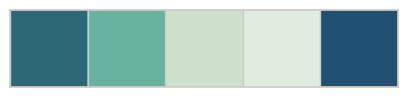

In [34]:
# Let's select a color pallete to use for our visualizations
colpal = ['#2C6975', '#68B2A0','#CDE0C9', '#E0ECDE', '#205072' ] # Assigning color codes
# Set the custom color palette
set_palette(colpal)

sns.palplot(colpal) # This will plot the colors 

<font size ="3">Now to see what unique values are contained in some of the columns. This is possible because the data set is small. This may not be feasible with a large data set.</font>

In [35]:
# Species Values
unique_species = sorted(df['Species'].unique())
unique_species

['DOG']

In [36]:
# Gender Values
unique_genders = sorted(df['Gender'].unique())
unique_genders

['F', 'M', 'U']

In [37]:
# Spayed or Neutered?
unique_spayed = sorted(df['SpayNeuter'].unique())
unique_spayed

['N', 'Y']

In [38]:
# Listing of neighborhoods/boroughs
unique_borgh = sorted(df['Borough'].unique())
unique_borgh

['Bronx', 'Brooklyn', 'Manhattan', 'Other', 'Queens', 'Staten Island']

In [39]:
# Years within the data frame
unique_year = sorted(df['BiteYear'].unique())
unique_year

[2015, 2016, 2017, 2018, 2019, 2020, 2021]

In [40]:
# Months within the data frame
unique_month = sorted(df['BiteMonth'].unique())
unique_month

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [41]:
df.head()

,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode,BiteMonth,BiteYear
0,2018-01-01,DOG,Unknown,0,U,N,Brooklyn,11220,1,2018
1,2018-01-04,DOG,Unknown,0,U,N,Brooklyn,0,1,2018
2,2018-01-06,DOG,Pit Bull,0,U,N,Brooklyn,11224,1,2018
3,2018-01-08,DOG,Mixed Breed,4,M,N,Brooklyn,11231,1,2018
4,2018-01-09,DOG,Pit Bull,0,U,N,Brooklyn,11224,1,2018


# **Visualization, Metrics and Trends**

## Gender Distribution
#### The following will return a Pie Chart with percentages and a Bar Chart with totals side by side.

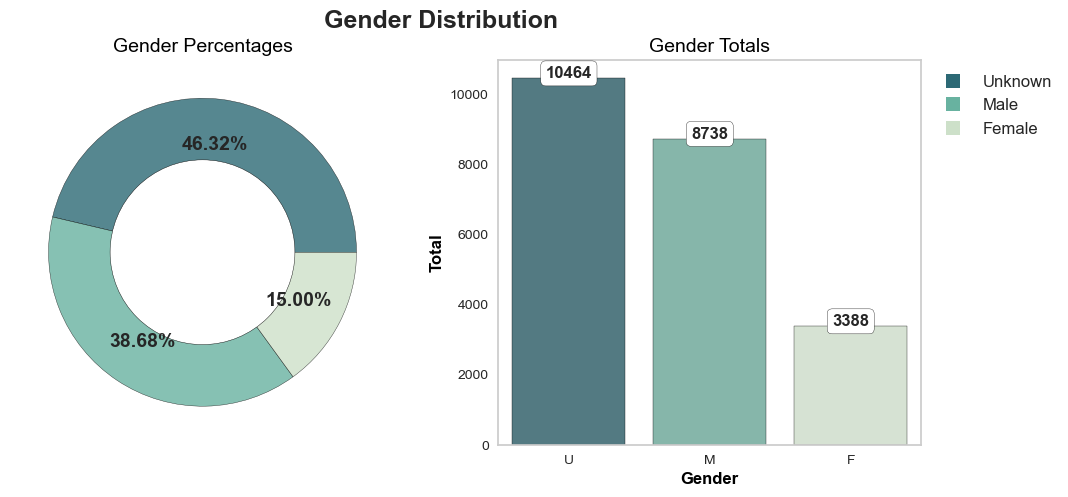

In [89]:
# --- Setting Colors, Labels, Order ---
colors=colpal

order=df['Gender'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(12, 5))
plt.suptitle('Gender Distribution', fontweight='bold', 
             fontsize='18', fontfamily='sans-serif')

# Pie Chart that contains percentages
plt.subplot(1, 2, 1)
#Styling the title for pie chart
plt.title('Gender Percentages', fontweight='medium', fontsize=14,
          fontfamily='sans-serif', color="black")

# Now to add plot values
plt.pie(df['Gender'].value_counts(), colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor="black"),
        textprops={'fontsize':14, 'fontweight': 'bold'})

# Add center circle, this will create 'donut' pie chart effect
centre=plt.Circle((0, 0), 0.60, fc='white', edgecolor="black")
plt.gcf().gca().add_artist(centre)

# Histogram for actual gender totals
countplt = plt.subplot(1, 2, 2)
plt.title('Gender Totals', fontweight='medium', fontsize=14, 
          fontfamily='sans-serif', color="black")
ax = sns.countplot(x='Gender', data=df, palette=colors, order=order,
                   edgecolor="black", alpha=0.85)
ax.grid(False)  # Turn off grid lines for the histogram
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,f'{int(rect.get_height())}', 
             horizontalalignment='center', fontsize=12, fontweight='bold', 
             bbox=dict(facecolor='white', edgecolor="black", 
                       linewidth=0.25, boxstyle='round'))
    
# Create custom legend
legend_elements = [
    Line2D([0], [0], marker='s', color='w', markerfacecolor='#2C6975', markersize=10, label='Unknown'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='#68B2A0', markersize=10, label='Male'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='#CDE0C9', markersize=10, label='Female')
]

# Add legend outside of the chart
ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)    
    

# Labeling
plt.xlabel('Gender', fontweight='bold', fontsize=12, fontfamily='sans-serif', 
           color="black")
plt.ylabel('Total', fontweight='bold', fontsize=12, fontfamily='sans-serif', 
           color="black")
plt.xticks([0, 1, 2])

plt.show()

## **Spay/Neuter Metric

In [43]:
# Calculate the percentage of dogs that have been fixed/neutered
total_dogs = len(df) # Gets the number of dogs
fixeddogs = (df['SpayNeuter'] == 'Y').sum() # Sums the neutered totals
notfixed = total_dogs - fixeddogs  # Calculation to subtract total number of dogs from those that are fixed

In [44]:
# Print the findings
print(f"Total number of dogs: {total_dogs}")
print(f"Number of dogs that have been Spayed/Neutered: {fixeddogs}")
print(f"Number of dogs NOT Spayed/Neautered:{ notfixed}")

Total number of dogs: 22658
Number of dogs that have been Spayed/Neutered: 5875
Number of dogs NOT Spayed/Neautered:16783


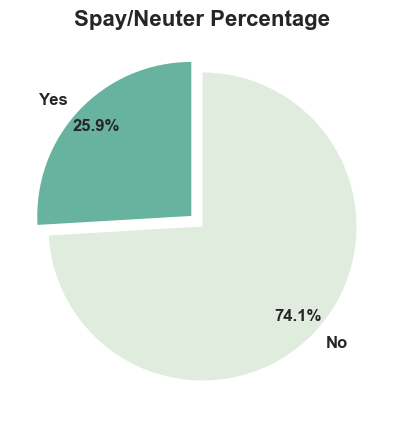

In [86]:
# Create a donut chart for the overall fixed/neutered percentage

# Specify how much to explode each slice
explode = (0.1, 0)  # Explode the first slice by 10%

# Specify colors for each section
colors_pie = ['#68B2A0', '#E0ECDE']

# Create the pie chart with the explode and colors parameters
plt.figure(figsize=(5, 5))
plt.pie([fixeddogs, notfixed], labels=['Yes', 'No'], autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode, colors=colors_pie, textprops={'fontsize': 12, 'fontweight': 'bold'})
fig = plt.gcf()
plt.title('Spay/Neuter Percentage', fontweight='bold', fontsize='16', fontfamily='sans-serif')
plt.show()

<font size="3"> Only a quarter of dogs within the bite study have been spayed/neutered.</font>

In [46]:
# How many male dogs have NOT been neutered?
count_nfixed_males = df[(df['Gender'] == 'M') & (df['SpayNeuter'] == 'N')].shape[0]

# Print or use the count as needed
print(f"Number of Male dogs that have NOT been Neutered: {count_nfixed_males}")

Number of Male dogs that have NOT been Neutered: 4652


### What are the Spay/Neuter percentages for each gender?

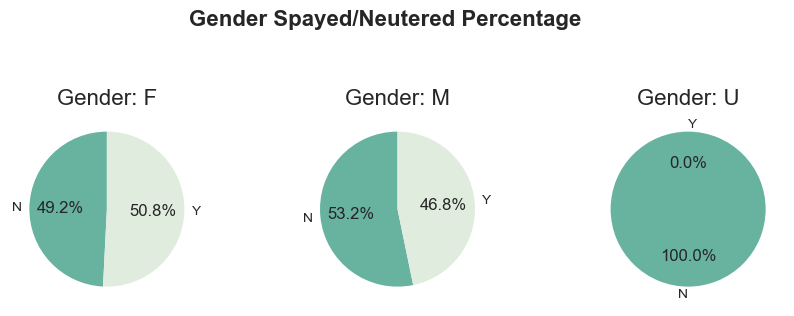

In [85]:
import matplotlib.pyplot as plt

# Specify colors for each section
colors_pie2 = ['#68B2A0', '#E0ECDE']

# Assuming your DataFrame is named df
gender_groups = df.groupby(['Gender', 'SpayNeuter']).size().unstack()

# Create a fixed number of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

# Plot pie charts for each gender
for i, (gender, values) in enumerate(gender_groups.iterrows()):
    ax = axes[i]
    ax.pie(values, labels=values.index, autopct='%1.1f%%', startangle=90, colors=colors_pie2)
    ax.set_title(f'Gender: {gender}', fontsize=16)
    
# Add a title to the trio of pie charts
fig.suptitle('Gender Spayed/Neutered Percentage', fontsize=16, fontweight='bold')

# Adjust the space between the title and the subplots
plt.subplots_adjust(top=0.85, wspace=0.5)

plt.show()


### Discrepancy in Spay/Neuter Status for Unknown Gender Dogs

<font size="3">During the analysis of the dog dataset, it was found that a small percentage <b>(0.6%)</b> of dogs with an unknown gender were recorded as being spayed or neutered. This discrepancy raises questions about the accuracy of the data once again. It seems inconsistent to have the spay/neuter status recorded without knowing the gender of the dog.

### Discrepency in the 'Unknown' Gender will be removed.

In [48]:
# Display the initial number of rows
initial_rows = len(df)
print(f"Initial number of rows: {initial_rows}")

# Filter the DataFrame
df_filtered = df[~((df['Gender'] == 'U') & (df['SpayNeuter'] == 'Y'))]

# Display the number of rows after filtering
filtered_rows = len(df_filtered)
print(f"Number of rows after removing .6% anomaly: {filtered_rows}")

# If you want to update the original DataFrame, you can do:
df = df_filtered

Initial number of rows: 22658
Number of rows after removing .6% anomaly: 22590


## Age Distribution

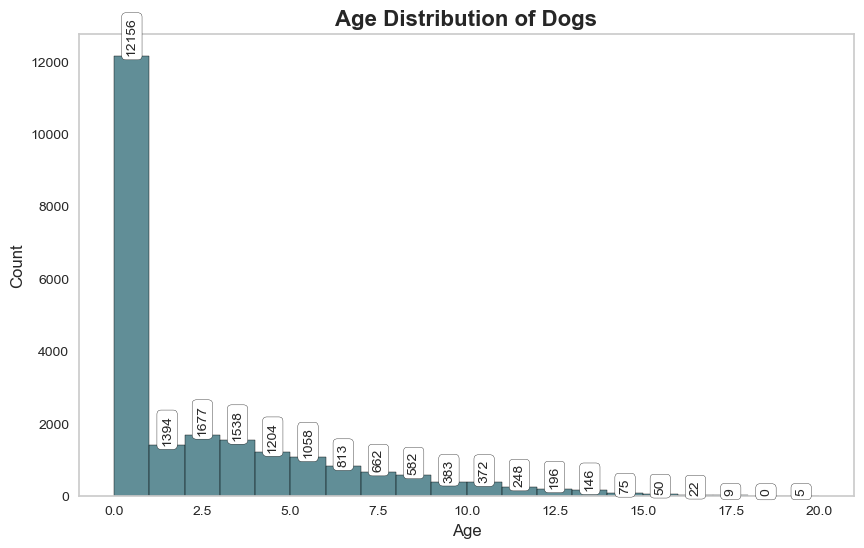

In [83]:
plt.figure(figsize=(10, 6))
p = sns.histplot(df['Age'], bins=20,fill=True)  

# Adding titles and labels
plt.title('Age Distribution of Dogs', fontweight='bold', 
             fontsize='16', fontfamily='sans-serif')
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.grid(False)

# Add data labels on top of the bars for 'N'
for bar in p.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval+1, round(yval, 2), ha='center', va='bottom',
             rotation=90, fontsize=10, bbox=dict(facecolor='white', edgecolor="black", 
                       linewidth=0.25, boxstyle='round')) 

# Displaying the plot
plt.show()

<font size="3">Most dogs ages are unknown. It's why the records with 'null'/'unknown' for the Age variable were kept; It's not uncommon for a dog to run off after an attack or for the dog to be unknown to the person bit but the record is still valid so 0 age value were kept.</font>

# **Geographic Metrics**

## Dog Bites by Borough

In [50]:
# Group boroughs and determine the number of bites
dogs_by_borough = df.groupby('Borough').size().reset_index(name='num_bites')

'Other' are incidences that occured outside of the NYC boroughs

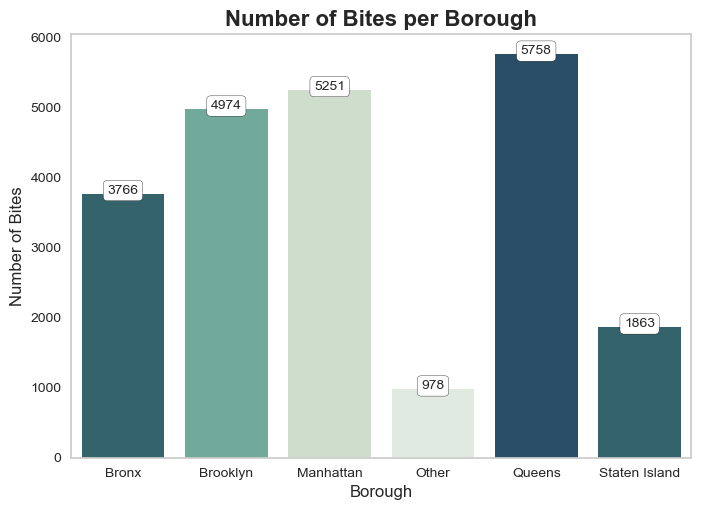

In [82]:
# Plotting the Seaborn bar chart
ax = sns.barplot(x='Borough', y='num_bites', data=dogs_by_borough, palette=colpal)#palette for custom colors

# Adding labels and title
plt.xlabel('Borough')
plt.ylabel('Number of Bites')
plt.title('Number of Bites per Borough', fontsize = 16, fontweight ='bold')


ax.grid(False)  # Turn off grid lines for the histogram

# Adding values on top of the bars
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,f'{int(rect.get_height())}', 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='white', edgecolor="black", 
                       linewidth=0.25, boxstyle='round'))
    

# Display the bar chart
plt.show()

<font size="3"> Staten Island has the lowest rate of bites.  More rearch needed to see why, are there other causes for the low bite rate? </font>

## Number of Spayed/Neutered dogs per Borough?

In [52]:
# Group by 'Neighborhood' and count the occurrences of 'Y' and 'N' in 'Spayed' column
spayed_counts = df.groupby('Borough')['SpayNeuter'].value_counts().unstack().fillna(0)

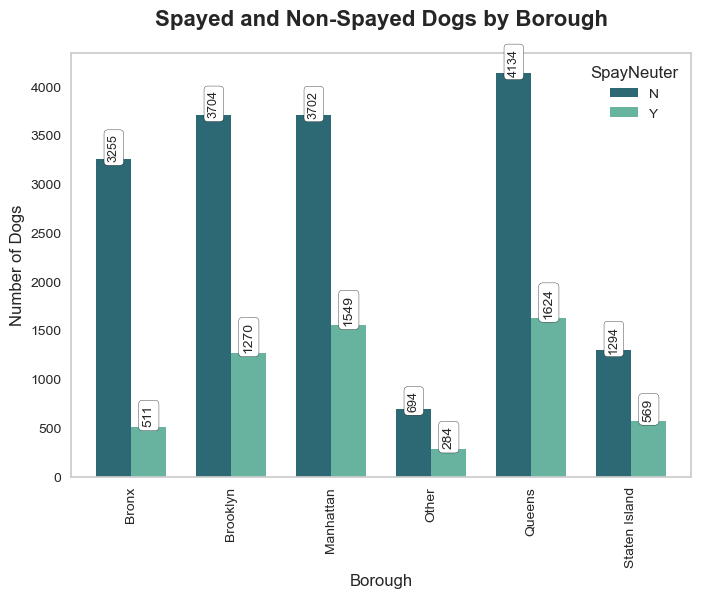

In [81]:
# Group by 'Neighborhood' and count the occurrences of 'Y' and 'N' in 'Spayed' column
spayed_counts = df.groupby('Borough')['SpayNeuter'].value_counts().unstack().fillna(0)

# Plotting a side-by-side bar chart
ax = spayed_counts.plot(kind='bar', stacked=False, width=0.7)


 # Adding values on top of the bars
for rect in ax.patches[:len(spayed_counts['Y'])]:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=9,rotation=90,
             bbox=dict(facecolor='white', edgecolor="black", 
                       linewidth=0.25, boxstyle='round'))     
    
# Add data labels on top of the bars for 'N'
for bar in ax.patches[len(spayed_counts['N']):]:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval+1, round(yval, 2), ha='center', va='bottom',
             rotation=90, fontsize=10, bbox=dict(facecolor='white', edgecolor="black", 
                       linewidth=0.25, boxstyle='round')) 


# Adding labels and title
plt.xlabel('Borough')
plt.ylabel('Number of Dogs')
plt.title('Spayed and Non-Spayed Dogs by Borough', pad=20, fontsize = 16, fontweight ='bold')

# Display the bar chart
plt.grid(False)
plt.show()
    

<font size ="3"> Regardless of Borough, Non Spayed/Neutered dogs have higher bite rates.  Does being Spayed/Neutered have a part to play in aggressiveness?

## Dog Genders Based on Borough?

In [54]:
# Group by 'Neighborhood' and count the occurrences of each gender
gender_counts = df.groupby('Borough')['Gender'].value_counts().unstack().fillna(0)

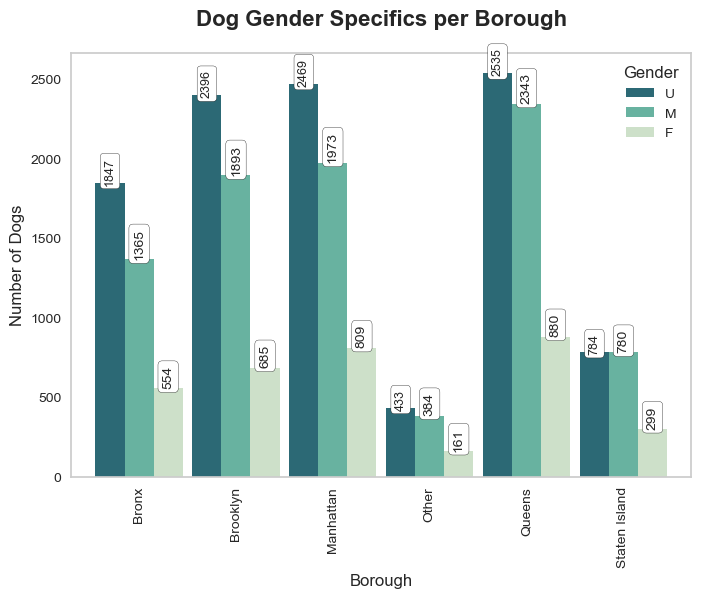

In [80]:
# Plotting a stacked bar chart
ax = gender_counts.plot(kind='bar', stacked=False, width=.9)

# Adding labels and title
plt.xlabel('Borough')
plt.ylabel('Number of Dogs')
plt.title('Dog Gender Specifics per Borough', pad=20, fontsize = 16, fontweight ='bold')  
    
# Adding values on top of the bars
for rect in ax.patches[:len(gender_counts['F'])]:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=9,rotation=90,
             bbox=dict(facecolor='white', edgecolor="black", 
                       linewidth=0.25, boxstyle='round'))     
    
ax.grid(False)  # Turn off grid lines for the histogram
    
    
    # Add data labels on top of the bars for 'N'
for bar in ax.patches[len(gender_counts['M']):]:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval+1, round(yval, 2), ha='center', va='bottom',
             rotation=90, fontsize=10, bbox=dict(facecolor='white', edgecolor="black", 
                       linewidth=0.25, boxstyle='round')) 

# Display the bar chart
plt.show()

## Highest bites per Borough based on type of Breed?

In [56]:
grouped = df.groupby(['Borough', 'Breed']).size().reset_index(name='Count')

# Sort the results and drop duplicates to get the most popular breed in each Borough
most_popular_breed_by_borough = grouped.sort_values(['Borough', 'Count'], ascending=[True, False]).drop_duplicates('Borough')

# Reset the index for better readability
most_popular_breed_by_borough.reset_index(drop=True, inplace=True)

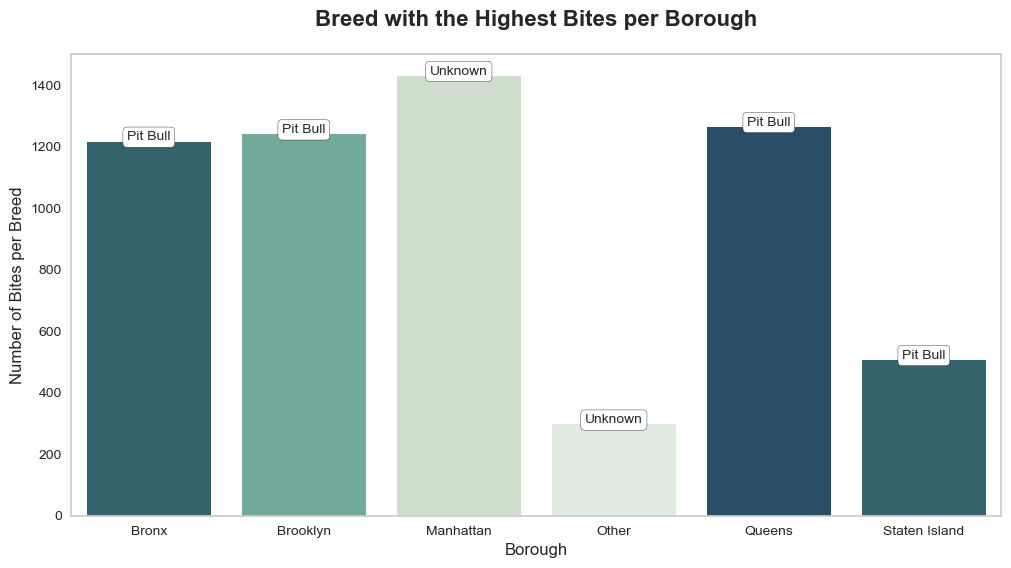

In [79]:
# Plotting the Seaborn bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Borough', y='Count', data=most_popular_breed_by_borough, palette=colpal)

# Adding breed names and total values on top of the bars
for i, rect in enumerate(ax.patches):
    breed_name = most_popular_breed_by_borough['Breed'].iloc[i]
    total_value = most_popular_breed_by_borough['Count'].iloc[i]
    
    # Adding breed names
    ax.text(rect.get_x() + rect.get_width() / 2,
            rect.get_height() + 4.25, breed_name,
            horizontalalignment='center', fontsize=10, 
            bbox=dict(facecolor='white', edgecolor="black",
                      linewidth=0.25, boxstyle='round'))

   
    ax.grid(False)  # Turn off grid lines for the histogram 

# Adding labels and title
plt.xlabel('Borough')
plt.ylabel('Number of Bites per Breed')
plt.title('Breed with the Highest Bites per Borough', pad=20,fontsize=16, fontweight='bold')

# Display the bar chart
plt.show()

<font size ="3"> <b> Insight:</b>  Unfortunately, the data shows that 2/3rds of dog bites are by Pit Bulls. No data is avalable on what provoked the biting incidence.

## Top 10 Dog Breeds for Bites

In [67]:
# Group by 'Breed' and calculate the size
breed_grps = df.groupby('Breed').size().reset_index(name='num_dogs_breed')

# Sort the DataFrame by 'num_dogs_breed' in descending order
breed_grps = breed_grps.sort_values(by='num_dogs_breed', ascending=False)

# Display the top 20 rows
top_10_breeds = breed_grps.head(10)

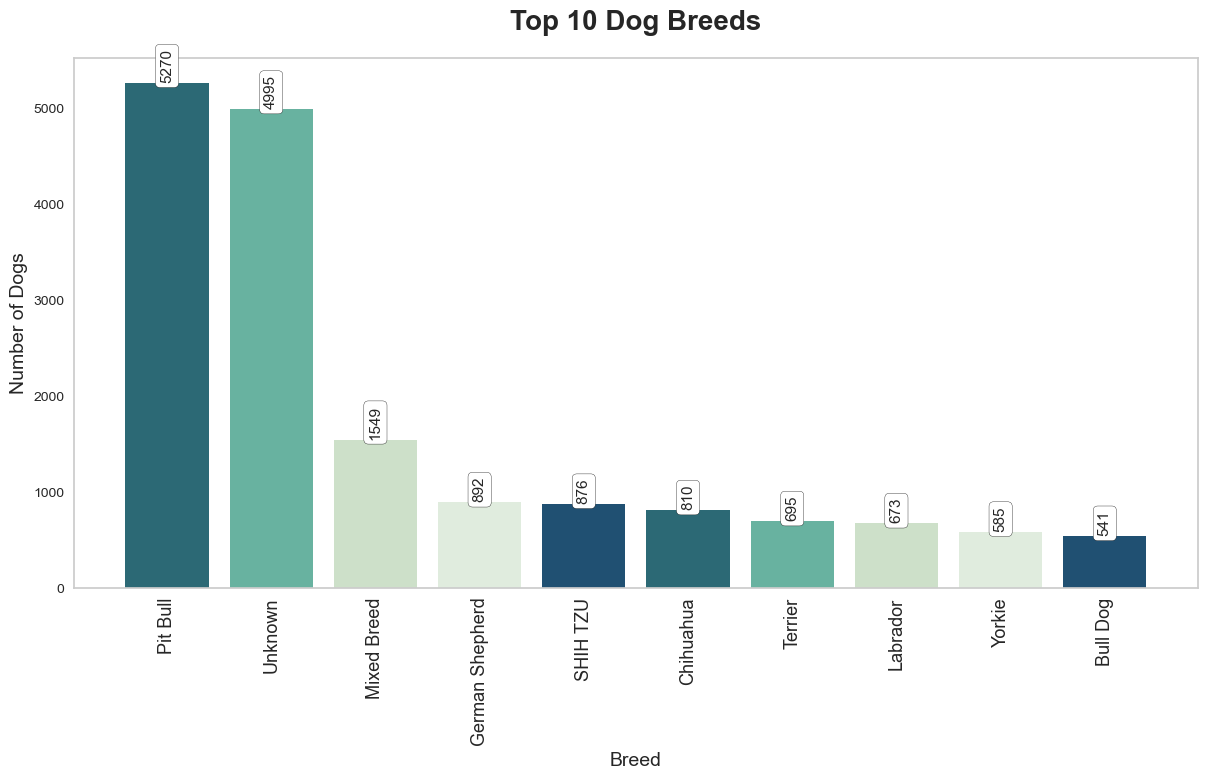

In [78]:
# Create a bar chart using matplotlib
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_breeds['Breed'], top_10_breeds['num_dogs_breed'], color=colpal)

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval+.5, round(yval, 2), ha='center', va='bottom',
             rotation=90, horizontalalignment='center', fontsize=11, 
             bbox=dict(facecolor='white', edgecolor="black", 
                       linewidth=0.25, boxstyle='round')) 
plt.grid(False)  # Turn off grid lines for the histogram
    
    
# Adjust text size and visibility
plt.tight_layout()
plt.xticks(rotation=90, ha='center', fontsize = 13)
plt.xlabel('Breed', fontsize = 14)
plt.ylabel('Number of Dogs', fontsize = 14)
plt.title('Top 10 Dog Breeds',pad=20, fontsize = 20, fontweight ='bold')

# Show the bar chart
plt.show()

## Bites based on Year/Month

In [60]:
# Bites by years
# Group boroughs and determine the number of bites
db_years = df.groupby('BiteYear').size().reset_index(name='num_bites')

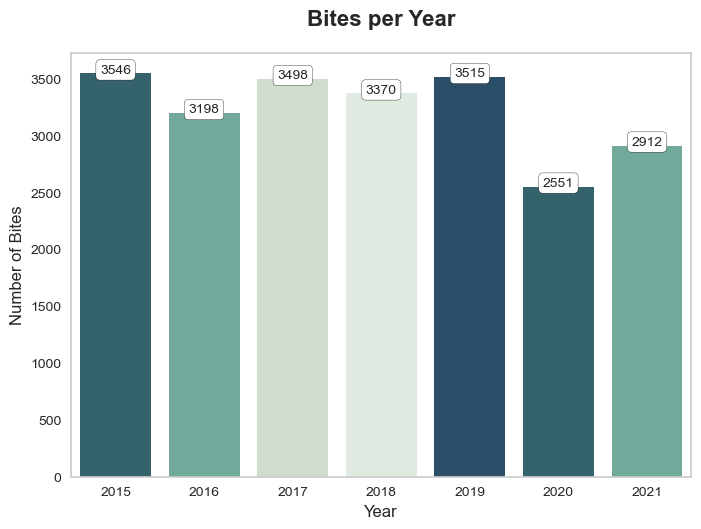

In [74]:
# Plotting the Seaborn bar chart
ax = sns.barplot(x='BiteYear', y='num_bites', data=db_years, palette=colpal)#palette for custom colors

# Adding labels and title
plt.xlabel('Year')  # Labels the x-axis
plt.ylabel('Number of Bites')  # Labels the y-axis
plt.title('Bites per Year', fontsize = 16, fontweight ='bold', pad=20)  # Labels and formats the title

# Adding values on top of the bars
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height() + 4.25,f'{int(rect.get_height())}', 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='white', edgecolor="black", 
                       linewidth=0.25, boxstyle='round'))
    
ax.grid(False)  # Turn off grid lines for the histogram    
    
# Display the bar chart
plt.show()

### Monthly Insights

In [62]:
# Which months have the highest bites?
# Bites by years
# Group boroughs and determine the number of bites
db_months = df.groupby('BiteMonth').size().reset_index(name='num_bites')

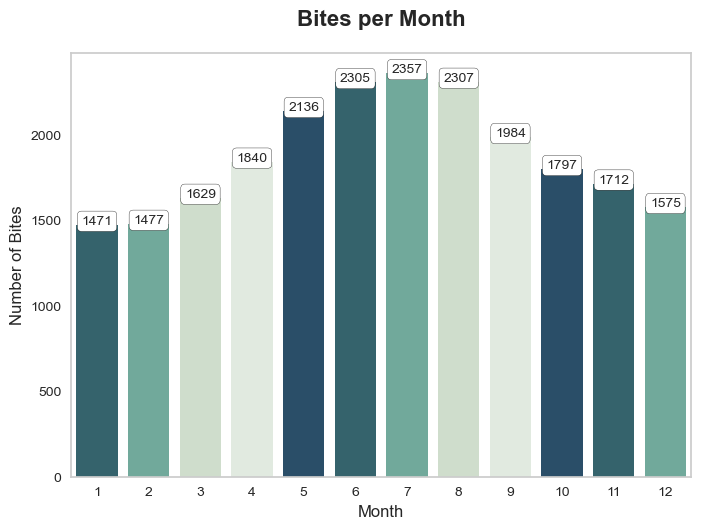

In [75]:
# Plotting the Seaborn bar chart
ax = sns.barplot(x='BiteMonth', y='num_bites', data=db_months, palette=colpal)#palette for custom colors

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Number of Bites')
plt.title('Bites per Month', fontsize = 16, fontweight ='bold', pad=20)

for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2,
            rect.get_height() + 4.25, f'{int(rect.get_height())}',  # Use formatted string to remove decimal point
            horizontalalignment='center', fontsize=10,
            bbox=dict(facecolor='white', edgecolor="black", linewidth=0.25, boxstyle='round')) 
    
ax.grid(False)  # Turn off grid lines for the histogram    
    
# Display the bar chart
plt.show()

<font size="3">The above bar chart shows the values for all years by month. Bites have shown their peak for the summer months (May(5) through August(8)). Numbers appear to trend according to popular times for outdoor activites.</font>

## Boroughs Through the Years

In [64]:
# Borough vs Year
# Group boroughs and determine the number of bites
bor_yr = df.groupby(['Borough', 'BiteYear']).size().reset_index(name='num_dogs')

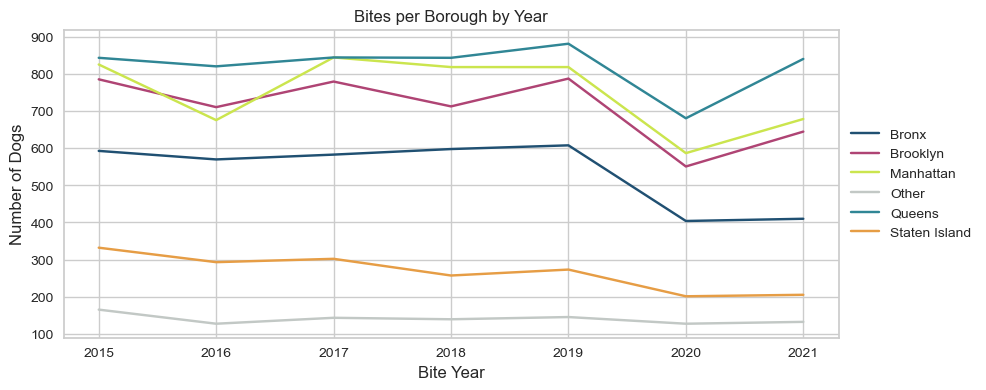

In [65]:
# Group data by Borough
borough_groups = bor_yr.groupby('Borough')

# Define a list of colors for each borough
borough_colors = {'Bronx': '#205072', 'Brooklyn': '#AF4474', 'Manhattan': '#CBE54E', 'Queens': '#308695', 'Staten Island': '#E69D45', 'Other':'#C2C8C5'}

# Plot dynamics for each borough with assigned colors
plt.figure(figsize=(10, 4))
for borough, group in borough_groups:
    plt.plot(group['BiteYear'], group['num_dogs'], label=borough, color=borough_colors[borough])
    
 
 #Add labels and title
plt.xlabel('Bite Year')
plt.ylabel('Number of Dogs')
plt.title('Bites per Borough by Year')

# Place the legend outside of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)  # Adjust fontsize as needed

# Show the plot
plt.show()

<font size ="3"> <b>Insights:</b> <p>
<ul>
    <li><b>Rising Trend:</b> Dog bite incidents have steadily increased each year from 2015 to 2021 with 2020 being the exception. 2020 showed less of an increase overall. More research would be needed to see if the Pandemic played any part in the lower numbers.<p>
        <li><b>Seasonal Pattern:</b> Incidents are lower from January to March, rising steadily from April and peaking in December.<p>
            <li><b>Peak Months:</b> The latter half of each year, especially August to December, sees the highest number of dog bites.<p>
</ul>

# Analysis Conclusion:

<font size ="3"> The dataset contains two problematic variables: 'UniqueID' and 'Unknown' Gender. To improve data quality, it is advisable to handle the original data for each year separately. By cleaning and preparing each year's data individually before merging, we can ensure that the issue of duplication with the 'UniqueID' variable will not affect any other analysis using the dataset. Although the integrity of the dataset wasn't entirely compromised, as I was able to complete my analysis after removing the 'UniqueID' column.</font>  <p>


<font size="3"><b> Recommendations:</b></font>
    
<font size ="3">For future datasets, it may be useful to employee pre-populated drop down menu or data validation when logging bite data into spreadsheet. This will add consistency to the 'Breed' and 'Age' columns.<p>

If possible, research into why so many dogs have not been spayed/neutered. Are there subsidzed programs available to NYC residents to help offset vet cost?
</font>

In [66]:
# Export DataFrame to a CSV file - file is deactivated to prevent repeated downloads.
#df.to_csv('2024_NY_DogBites_Cleaned.csv', index=False)  # Set index=False to exclude row numbers in the CSV file